# MSiA 400 - Final Project
## Modeling: Prophet_model
### Team 12: Alejandra Lelo de Larrea Ibarra, Xin Shu, Yi Chen, Yiqing Cheng

In [1]:
import pandas as pd
import psycopg2
from psycopg2 import Error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
import math

Importing plotly failed. Interactive plots will not work.


In [2]:
try:
    # Connect to an existing database
    connection = psycopg2.connect(database="2022-everything-team12", 
                            user='ycm3076', 
                            password='C13655814908y!', 
                            host='pg.analytics.northwestern.edu', 
                            port= '5432')

    # Create a cursor to perform database operations
    cursor = connection.cursor()
    # Print PostgreSQL details
    cursor.execute("SELECT version();")
    # Fetch result
    record = cursor.fetchone()
    print("You are connected to - ", record, "\n")
except (Exception, Error) as error:
    print("Error while connecting to PostgreSQL", error)
df1 = pd.read_sql("select * from \"aggtrnsactdaily\"", connection);
df2 = pd.read_sql("select * from \"aggtrnsactdaily2\"", connection);
if (connection):
    cursor.close()
    connection.close()
    print("PostgreSQL connection is closed") 


You are connected to -  ('PostgreSQL 10.12 on x86_64-pc-linux-gnu, compiled by gcc (GCC) 4.8.5 20150623 (Red Hat 4.8.5-39), 64-bit',) 

PostgreSQL connection is closed


/tmp/ipykernel_586722/1041667879.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = pd.read_sql("select * from \"aggtrnsactdaily\"", connection);
/tmp/ipykernel_586722/1041667879.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = pd.read_sql("select * from \"aggtrnsactdaily2\"", connection);


## Construct Dataset

In [3]:
df1.tail()
df2.tail()

,saledate,nstores,nsku,totalquantity,avgquantity,totalamt,avgamt,minamt,maxamt,totalorigprice,...,maxdiscount,totalprofit,avgprofittrnsact,minprofit,maxprofit,nstore,ncities,ndept,nvendors,avgvendorsstore
384,2005-08-26,324,144548,482390,525,19215591.82,20932.017233,0.0,1200.0,8968694.40,...,490.88,2344460.0,2553.876089,0.0,450.00,324,263,60,1056,3
385,2005-08-27,325,174635,726056,790,29404178.67,31995.841861,0.0,1200.0,14044552.29,...,540.00,3903930.0,4248.019859,0.0,555.29,325,264,60,1098,3
386,2005-02-23,324,154375,818303,739,36239176.72,32736.383668,0.0,1298.0,10507344.52,...,843.70,0.0,0.000000,0.0,780.00,324,263,58,1035,3
387,2005-02-24,324,155570,839153,735,35454568.88,31073.241788,0.0,1200.0,10844948.29,...,596.25,0.0,0.000000,0.0,495.00,324,263,58,1059,3
388,2005-02-25,324,163112,892854,774,37062627.79,32144.516730,0.0,1200.0,12367866.48,...,521.25,0.0,0.000000,0.0,500.00,324,263,58,1088,3


In [4]:
# check the data
df1 = df1.sort_values(by=['saledate'])
df2 = df2.sort_values(by=['saledate'])

In [5]:
df1.columns

Index(['saledate', 'nstores', 'nsku', 'totalquantity', 'avgquantity',
       'totalamt', 'avgamt', 'minamt', 'maxamt', 'totalorigprice',
       'avgorigprice', 'minorigprice', 'maxorigprice', 'totalretail',
       'avgretail', 'minretail', 'maxretail', 'avgretailtrnsact', 'totalcost',
       'avgcost', 'mincost', 'maxcost', 'avgcosttrnsact', 'totaldiscount',
       'avgdiscounttrnsact', 'mindiscount', 'maxdiscount', 'totalprofit',
       'avgprofittrnsact', 'minprofit', 'maxprofit', 'nstore', 'ncities',
       'ndept', 'nvendors', 'avgvendorsstore'],
      dtype='object')

In [6]:
df2.columns

Index(['saledate', 'nstores', 'nsku', 'totalquantity', 'avgquantity',
       'totalamt', 'avgamt', 'minamt', 'maxamt', 'totalorigprice',
       'avgorigprice', 'minorigprice', 'maxorigprice', 'totalretail',
       'avgretail', 'minretail', 'maxretail', 'avgretailtrnsact', 'totalcost',
       'avgcost', 'mincost', 'maxcost', 'avgcosttrnsact', 'totaldiscount',
       'avgdiscounttrnsact', 'mindiscount', 'maxdiscount', 'totalprofit',
       'avgprofittrnsact', 'minprofit', 'maxprofit', 'nstore', 'ncities',
       'ndept', 'nvendors', 'avgvendorsstore'],
      dtype='object')

In [7]:
# check null value counts
df1.notnull().sum()

saledate              389
nstores               389
nsku                  389
totalquantity         389
avgquantity           389
totalamt              389
avgamt                389
minamt                389
maxamt                389
totalorigprice        389
avgorigprice          389
minorigprice          389
maxorigprice          389
totalretail           389
avgretail             389
minretail             389
maxretail             389
avgretailtrnsact      389
totalcost             389
avgcost               389
mincost               389
maxcost               389
avgcosttrnsact        389
totaldiscount         389
avgdiscounttrnsact    389
mindiscount           389
maxdiscount           389
totalprofit           389
avgprofittrnsact      389
minprofit             389
maxprofit             389
nstore                389
ncities               389
ndept                 389
nvendors              389
avgvendorsstore       389
dtype: int64

In [8]:
df2.notnull().sum()

saledate              389
nstores               389
nsku                  389
totalquantity         389
avgquantity           389
totalamt              389
avgamt                389
minamt                389
maxamt                389
totalorigprice        389
avgorigprice          389
minorigprice          389
maxorigprice          389
totalretail           389
avgretail             389
minretail             389
maxretail             389
avgretailtrnsact      389
totalcost             389
avgcost               389
mincost               389
maxcost               389
avgcosttrnsact        389
totaldiscount         389
avgdiscounttrnsact    389
mindiscount           389
maxdiscount           389
totalprofit           389
avgprofittrnsact      389
minprofit             389
maxprofit             389
nstore                389
ncities               389
ndept                 389
nvendors              389
avgvendorsstore       389
dtype: int64

In [9]:
df1

,saledate,nstores,nsku,totalquantity,avgquantity,totalamt,avgamt,minamt,maxamt,totalorigprice,...,maxdiscount,totalprofit,avgprofittrnsact,minprofit,maxprofit,nstore,ncities,ndept,nvendors,avgvendorsstore
0,2004-08-01,323,61741,188073,783,6035654.36,25148.559833,0.0,895.0,4467905.60,...,118.50,511060.0,2129.418229,-103.75,275.00,323,262,58,852,2
1,2004-08-02,324,59183,177143,208,5637192.49,6624.197991,0.0,1200.0,4174584.51,...,325.00,532033.0,625.185444,-82.50,359.00,324,263,58,827,2
2,2004-08-03,324,62593,212625,233,6569613.74,7219.355758,0.0,895.0,4833202.76,...,119.00,659895.0,725.159066,-103.75,393.00,324,263,58,842,2
3,2004-08-04,324,65689,218053,241,6874637.33,7604.687312,0.0,895.0,4974026.91,...,275.00,631430.0,698.484375,-142.00,393.00,324,263,58,843,2
4,2004-08-05,325,68941,225237,289,7913489.50,10184.671171,0.0,1200.0,5501540.60,...,275.00,635209.0,817.514640,-177.50,393.00,325,263,58,870,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,2005-08-23,325,84999,216712,226,7457004.46,7800.213870,0.0,1200.0,5141321.76,...,347.50,1477840.0,1545.861402,-297.50,768.75,325,264,60,944,2
385,2005-08-24,325,140901,466006,496,19248987.11,20521.308220,0.0,1200.0,8398192.33,...,476.00,1982620.0,2113.670176,-151.25,555.29,325,264,60,1041,3
386,2005-08-25,325,134977,422296,442,17062480.18,17885.199350,0.0,1200.0,7772270.13,...,581.75,1943150.0,2036.842243,-180.00,500.00,325,264,60,1019,3
387,2005-08-26,324,144548,482390,525,19215591.82,20932.017233,0.0,1200.0,8968694.40,...,490.88,2344460.0,2553.876089,-370.01,450.00,324,263,60,1056,3


In [10]:
df2

,saledate,nstores,nsku,totalquantity,avgquantity,totalamt,avgamt,minamt,maxamt,totalorigprice,...,maxdiscount,totalprofit,avgprofittrnsact,minprofit,maxprofit,nstore,ncities,ndept,nvendors,avgvendorsstore
0,2004-08-01,323,61741,188073,783,6035654.36,25148.559833,0.0,895.0,4467905.60,...,118.50,511060.0,2129.418229,0.0,275.00,323,262,58,852,2
1,2004-08-02,324,59183,177143,208,5637192.49,6624.197991,0.0,1200.0,4174584.51,...,325.00,532033.0,625.185444,0.0,359.00,324,263,58,827,2
2,2004-08-03,324,62593,212625,233,6569613.74,7219.355758,0.0,895.0,4833202.76,...,119.00,659895.0,725.159066,0.0,393.00,324,263,58,842,2
3,2004-08-04,324,65689,218053,241,6874637.33,7604.687312,0.0,895.0,4974026.91,...,275.00,631430.0,698.484375,0.0,393.00,324,263,58,843,2
4,2004-08-05,325,68941,225237,289,7913489.50,10184.671171,0.0,1200.0,5501540.60,...,275.00,635209.0,817.514640,0.0,393.00,325,263,58,870,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,2005-08-23,325,84999,216712,226,7457004.46,7800.213870,0.0,1200.0,5141321.76,...,347.50,1477840.0,1545.861402,0.0,768.75,325,264,60,944,2
382,2005-08-24,325,140901,466006,496,19248987.11,20521.308220,0.0,1200.0,8398192.33,...,476.00,1982620.0,2113.670176,0.0,555.29,325,264,60,1041,3
383,2005-08-25,325,134977,422296,442,17062480.18,17885.199350,0.0,1200.0,7772270.13,...,581.75,1943150.0,2036.842243,0.0,500.00,325,264,60,1019,3
384,2005-08-26,324,144548,482390,525,19215591.82,20932.017233,0.0,1200.0,8968694.40,...,490.88,2344460.0,2553.876089,0.0,450.00,324,263,60,1056,3


In [11]:
def join_macro(df):
    unemployee = pd.read_csv("UNRATE.csv")
    cpi = pd.read_csv("cpi.csv")
    dff = pd.read_csv("DFF.csv")
    df['saledate']= pd.to_datetime(df['saledate'])
    cpi['DATE']= pd.to_datetime(cpi['DATE'])
    unemployee['DATE']= pd.to_datetime(unemployee['DATE'])
    dff['DATE']= pd.to_datetime(dff['DATE'])
    df_combined = pd.merge(df.assign(grouper=df['saledate'].dt.to_period('M')),
                   cpi.assign(grouper=cpi['DATE'].dt.to_period('M')),
                   how='left', on='grouper')
    df_combined = pd.merge(df_combined.assign(grouper=df_combined['saledate'].dt.to_period('M')),
                   unemployee.assign(grouper=unemployee['DATE'].dt.to_period('M')),
                   how='left', on='grouper')
    df_combined = pd.merge(df_combined.assign(grouper=df_combined['saledate'].dt.to_period('D')),
                   dff.assign(grouper=dff['DATE'].dt.to_period('D')),
                   how='left', on='grouper')
    df_combined = df_combined.drop(columns = ["grouper","DATE_x","DATE_y","DATE"])
    
    return df_combined

In [12]:
df_combined1 = join_macro(df1)
df_combined1

,saledate,nstores,nsku,totalquantity,avgquantity,totalamt,avgamt,minamt,maxamt,totalorigprice,...,minprofit,maxprofit,nstore,ncities,ndept,nvendors,avgvendorsstore,CORESTICKM159SFRBATL,UNRATE,DFF
0,2004-08-01,323,61741,188073,783,6035654.36,25148.559833,0.0,895.0,4467905.60,...,-103.75,275.00,323,262,58,852,2,2.257729,5.4,1.29
1,2004-08-02,324,59183,177143,208,5637192.49,6624.197991,0.0,1200.0,4174584.51,...,-82.50,359.00,324,263,58,827,2,2.257729,5.4,1.28
2,2004-08-03,324,62593,212625,233,6569613.74,7219.355758,0.0,895.0,4833202.76,...,-103.75,393.00,324,263,58,842,2,2.257729,5.4,1.24
3,2004-08-04,324,65689,218053,241,6874637.33,7604.687312,0.0,895.0,4974026.91,...,-142.00,393.00,324,263,58,843,2,2.257729,5.4,1.22
4,2004-08-05,325,68941,225237,289,7913489.50,10184.671171,0.0,1200.0,5501540.60,...,-177.50,393.00,325,263,58,870,2,2.257729,5.4,1.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,2005-08-23,325,84999,216712,226,7457004.46,7800.213870,0.0,1200.0,5141321.76,...,-297.50,768.75,325,264,60,944,2,2.264406,4.9,3.49
385,2005-08-24,325,140901,466006,496,19248987.11,20521.308220,0.0,1200.0,8398192.33,...,-151.25,555.29,325,264,60,1041,3,2.264406,4.9,3.50
386,2005-08-25,325,134977,422296,442,17062480.18,17885.199350,0.0,1200.0,7772270.13,...,-180.00,500.00,325,264,60,1019,3,2.264406,4.9,3.55
387,2005-08-26,324,144548,482390,525,19215591.82,20932.017233,0.0,1200.0,8968694.40,...,-370.01,450.00,324,263,60,1056,3,2.264406,4.9,3.54


In [13]:
df_combined2 = join_macro(df2)
df_combined2

,saledate,nstores,nsku,totalquantity,avgquantity,totalamt,avgamt,minamt,maxamt,totalorigprice,...,minprofit,maxprofit,nstore,ncities,ndept,nvendors,avgvendorsstore,CORESTICKM159SFRBATL,UNRATE,DFF
0,2004-08-01,323,61741,188073,783,6035654.36,25148.559833,0.0,895.0,4467905.60,...,0.0,275.00,323,262,58,852,2,2.257729,5.4,1.29
1,2004-08-02,324,59183,177143,208,5637192.49,6624.197991,0.0,1200.0,4174584.51,...,0.0,359.00,324,263,58,827,2,2.257729,5.4,1.28
2,2004-08-03,324,62593,212625,233,6569613.74,7219.355758,0.0,895.0,4833202.76,...,0.0,393.00,324,263,58,842,2,2.257729,5.4,1.24
3,2004-08-04,324,65689,218053,241,6874637.33,7604.687312,0.0,895.0,4974026.91,...,0.0,393.00,324,263,58,843,2,2.257729,5.4,1.22
4,2004-08-05,325,68941,225237,289,7913489.50,10184.671171,0.0,1200.0,5501540.60,...,0.0,393.00,325,263,58,870,2,2.257729,5.4,1.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,2005-08-23,325,84999,216712,226,7457004.46,7800.213870,0.0,1200.0,5141321.76,...,0.0,768.75,325,264,60,944,2,2.264406,4.9,3.49
385,2005-08-24,325,140901,466006,496,19248987.11,20521.308220,0.0,1200.0,8398192.33,...,0.0,555.29,325,264,60,1041,3,2.264406,4.9,3.50
386,2005-08-25,325,134977,422296,442,17062480.18,17885.199350,0.0,1200.0,7772270.13,...,0.0,500.00,325,264,60,1019,3,2.264406,4.9,3.55
387,2005-08-26,324,144548,482390,525,19215591.82,20932.017233,0.0,1200.0,8968694.40,...,0.0,450.00,324,263,60,1056,3,2.264406,4.9,3.54


In [14]:
def plot_profit(df_combined):
    df_groupyed = df_combined
    color_pal = sns.color_palette()
    # set df index as date
    df_ts = df_groupyed.set_index('saledate')
    df_ts.index = pd.to_datetime(df_ts.index)
    # check distribution of amount (no pattern found)
    df_ts_draw = df_ts["totalprofit"]
    df_ts_draw.plot(style='.',
            figsize=(15, 5),
            color=color_pal[0],
            title='Number')
    plt.show()
    return df_ts

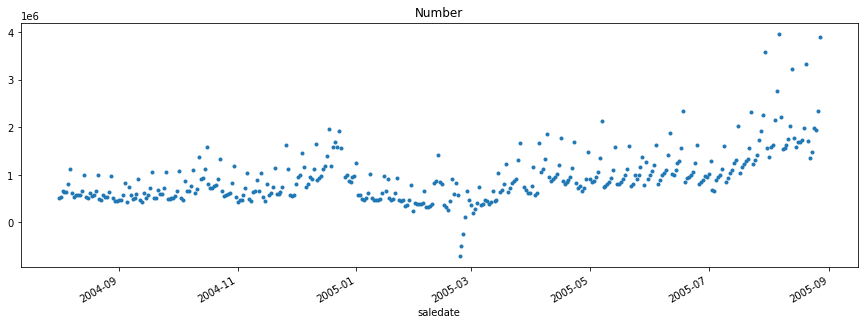

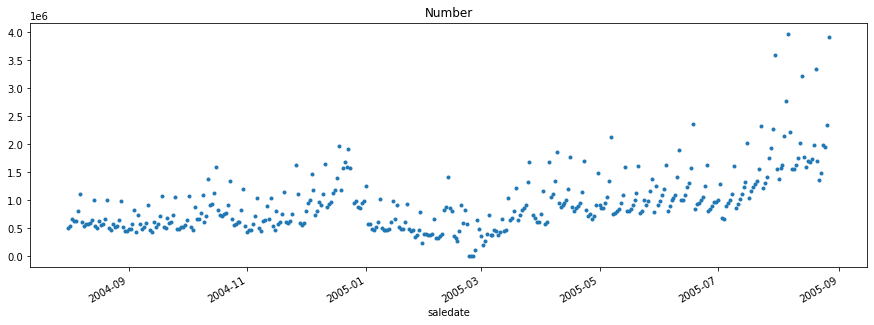

In [15]:
df_ts1 = plot_profit(df_combined1)
df_ts2 = plot_profit(df_combined2)

In [16]:
df_ts1

,nstores,nsku,totalquantity,avgquantity,totalamt,avgamt,minamt,maxamt,totalorigprice,avgorigprice,...,minprofit,maxprofit,nstore,ncities,ndept,nvendors,avgvendorsstore,CORESTICKM159SFRBATL,UNRATE,DFF
saledate,,,,,,,,,,,,,,,,,,,,,
2004-08-01,323,61741,188073,783,6035654.36,25148.559833,0.0,895.0,4467905.60,23.756231,...,-103.75,275.00,323,262,58,852,2,2.257729,5.4,1.29
2004-08-02,324,59183,177143,208,5637192.49,6624.197991,0.0,1200.0,4174584.51,23.566184,...,-82.50,359.00,324,263,58,827,2,2.257729,5.4,1.28
2004-08-03,324,62593,212625,233,6569613.74,7219.355758,0.0,895.0,4833202.76,22.731112,...,-103.75,393.00,324,263,58,842,2,2.257729,5.4,1.24
2004-08-04,324,65689,218053,241,6874637.33,7604.687312,0.0,895.0,4974026.91,22.811091,...,-142.00,393.00,324,263,58,843,2,2.257729,5.4,1.22
2004-08-05,325,68941,225237,289,7913489.50,10184.671171,0.0,1200.0,5501540.60,24.425563,...,-177.50,393.00,325,263,58,870,2,2.257729,5.4,1.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-08-23,325,84999,216712,226,7457004.46,7800.213870,0.0,1200.0,5141321.76,23.724214,...,-297.50,768.75,325,264,60,944,2,2.264406,4.9,3.49
2005-08-24,325,140901,466006,496,19248987.11,20521.308220,0.0,1200.0,8398192.33,18.021640,...,-151.25,555.29,325,264,60,1041,3,2.264406,4.9,3.50
2005-08-25,325,134977,422296,442,17062480.18,17885.199350,0.0,1200.0,7772270.13,18.404792,...,-180.00,500.00,325,264,60,1019,3,2.264406,4.9,3.55


In [17]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofmonth'] = df.index.day
    return df
# create time series features
df_ts1 = create_features(df_ts1)
df_ts2 = create_features(df_ts2)
df_ts1

,nstores,nsku,totalquantity,avgquantity,totalamt,avgamt,minamt,maxamt,totalorigprice,avgorigprice,...,nvendors,avgvendorsstore,CORESTICKM159SFRBATL,UNRATE,DFF,dayofweek,quarter,month,year,dayofmonth
saledate,,,,,,,,,,,,,,,,,,,,,
2004-08-01,323,61741,188073,783,6035654.36,25148.559833,0.0,895.0,4467905.60,23.756231,...,852,2,2.257729,5.4,1.29,6,3,8,2004,1
2004-08-02,324,59183,177143,208,5637192.49,6624.197991,0.0,1200.0,4174584.51,23.566184,...,827,2,2.257729,5.4,1.28,0,3,8,2004,2
2004-08-03,324,62593,212625,233,6569613.74,7219.355758,0.0,895.0,4833202.76,22.731112,...,842,2,2.257729,5.4,1.24,1,3,8,2004,3
2004-08-04,324,65689,218053,241,6874637.33,7604.687312,0.0,895.0,4974026.91,22.811091,...,843,2,2.257729,5.4,1.22,2,3,8,2004,4
2004-08-05,325,68941,225237,289,7913489.50,10184.671171,0.0,1200.0,5501540.60,24.425563,...,870,2,2.257729,5.4,1.30,3,3,8,2004,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-08-23,325,84999,216712,226,7457004.46,7800.213870,0.0,1200.0,5141321.76,23.724214,...,944,2,2.264406,4.9,3.49,1,3,8,2005,23
2005-08-24,325,140901,466006,496,19248987.11,20521.308220,0.0,1200.0,8398192.33,18.021640,...,1041,3,2.264406,4.9,3.50,2,3,8,2005,24
2005-08-25,325,134977,422296,442,17062480.18,17885.199350,0.0,1200.0,7772270.13,18.404792,...,1019,3,2.264406,4.9,3.55,3,3,8,2005,25


In [18]:
orignal_features = list(df_combined1.columns)
orignal_features.remove('saledate')
orignal_features.remove('nstores')
orignal_features

['nsku',
 'totalquantity',
 'avgquantity',
 'totalamt',
 'avgamt',
 'minamt',
 'maxamt',
 'totalorigprice',
 'avgorigprice',
 'minorigprice',
 'maxorigprice',
 'totalretail',
 'avgretail',
 'minretail',
 'maxretail',
 'avgretailtrnsact',
 'totalcost',
 'avgcost',
 'mincost',
 'maxcost',
 'avgcosttrnsact',
 'totaldiscount',
 'avgdiscounttrnsact',
 'mindiscount',
 'maxdiscount',
 'totalprofit',
 'avgprofittrnsact',
 'minprofit',
 'maxprofit',
 'nstore',
 'ncities',
 'ndept',
 'nvendors',
 'avgvendorsstore',
 'CORESTICKM159SFRBATL',
 'UNRATE',
 'DFF']

In [19]:
# TODO: add lags
def create_lag_feature(df, column):
    '''
    Create time lagging features
    '''
    df = df.copy()
    average_value = np.mean(df[column])
    df[column + '_1'] = df[column].shift(1,fill_value = average_value)
    df[column + '_2'] = df[column].shift(2,fill_value = average_value)
    df[column + '_3'] = df[column].shift(3,fill_value = average_value)
    df[column + '_4'] = df[column].shift(4,fill_value = average_value)
    df[column + '_5'] = df[column].shift(5,fill_value = average_value)
    df[column + '_6'] = df[column].shift(6,fill_value = average_value)
    df[column + '_7'] = df[column].shift(7,fill_value = average_value)
    df[column + '_14'] = df[column].shift(14,fill_value = average_value)
    df[column + '_28'] = df[column].shift(28,fill_value = average_value)
    return df

In [20]:
df_model1 = df_ts1
for col in orignal_features:
    df_model1 = create_lag_feature(df_model1, col)

orignal_features1 = orignal_features.copy()
orignal_features1.remove('totalprofit')
df_ts_lagged1 = df_model1.drop(orignal_features1, axis=1)
df_ts_lagged1

,nstores,totalprofit,dayofweek,quarter,month,year,dayofmonth,nsku_1,nsku_2,nsku_3,...,UNRATE_28,DFF_1,DFF_2,DFF_3,DFF_4,DFF_5,DFF_6,DFF_7,DFF_14,DFF_28
saledate,,,,,,,,,,,,,,,,,,,,,
2004-08-01,323,511060.0,6,3,8,2004,1,89270.339332,89270.339332,89270.339332,...,5.247815,2.442339,2.442339,2.442339,2.442339,2.442339,2.442339,2.442339,2.442339,2.442339
2004-08-02,324,532033.0,0,3,8,2004,2,61741.000000,89270.339332,89270.339332,...,5.247815,1.290000,2.442339,2.442339,2.442339,2.442339,2.442339,2.442339,2.442339,2.442339
2004-08-03,324,659895.0,1,3,8,2004,3,59183.000000,61741.000000,89270.339332,...,5.247815,1.280000,1.290000,2.442339,2.442339,2.442339,2.442339,2.442339,2.442339,2.442339
2004-08-04,324,631430.0,2,3,8,2004,4,62593.000000,59183.000000,61741.000000,...,5.247815,1.240000,1.280000,1.290000,2.442339,2.442339,2.442339,2.442339,2.442339,2.442339
2004-08-05,325,635209.0,3,3,8,2004,5,65689.000000,62593.000000,59183.000000,...,5.247815,1.220000,1.240000,1.280000,1.290000,2.442339,2.442339,2.442339,2.442339,2.442339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-08-23,325,1477840.0,1,3,8,2005,23,85508.000000,98483.000000,142337.000000,...,5.000000,3.510000,3.540000,3.540000,3.540000,3.500000,3.570000,3.460000,3.470000,3.250000
2005-08-24,325,1982620.0,2,3,8,2005,24,84999.000000,85508.000000,98483.000000,...,5.000000,3.490000,3.510000,3.540000,3.540000,3.540000,3.500000,3.570000,3.480000,3.270000
2005-08-25,325,1943150.0,3,3,8,2005,25,140901.000000,84999.000000,85508.000000,...,5.000000,3.500000,3.490000,3.510000,3.540000,3.540000,3.540000,3.500000,3.510000,3.270000


In [21]:
df_model2 = df_ts2
for col in orignal_features:
    df_model2 = create_lag_feature(df_model2, col)

orignal_features1 = orignal_features.copy()
orignal_features1.remove('totalprofit')
df_ts_lagged2 = df_model2.drop(orignal_features1, axis=1)
df_ts_lagged2

,nstores,totalprofit,dayofweek,quarter,month,year,dayofmonth,nsku_1,nsku_2,nsku_3,...,UNRATE_28,DFF_1,DFF_2,DFF_3,DFF_4,DFF_5,DFF_6,DFF_7,DFF_14,DFF_28
saledate,,,,,,,,,,,,,,,,,,,,,
2004-08-01,323,511060.0,6,3,8,2004,1,89270.339332,89270.339332,89270.339332,...,5.247815,2.442339,2.442339,2.442339,2.442339,2.442339,2.442339,2.442339,2.442339,2.442339
2004-08-02,324,532033.0,0,3,8,2004,2,61741.000000,89270.339332,89270.339332,...,5.247815,1.290000,2.442339,2.442339,2.442339,2.442339,2.442339,2.442339,2.442339,2.442339
2004-08-03,324,659895.0,1,3,8,2004,3,59183.000000,61741.000000,89270.339332,...,5.247815,1.280000,1.290000,2.442339,2.442339,2.442339,2.442339,2.442339,2.442339,2.442339
2004-08-04,324,631430.0,2,3,8,2004,4,62593.000000,59183.000000,61741.000000,...,5.247815,1.240000,1.280000,1.290000,2.442339,2.442339,2.442339,2.442339,2.442339,2.442339
2004-08-05,325,635209.0,3,3,8,2004,5,65689.000000,62593.000000,59183.000000,...,5.247815,1.220000,1.240000,1.280000,1.290000,2.442339,2.442339,2.442339,2.442339,2.442339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-08-23,325,1477840.0,1,3,8,2005,23,85508.000000,98483.000000,142337.000000,...,5.000000,3.510000,3.540000,3.540000,3.540000,3.500000,3.570000,3.460000,3.470000,3.250000
2005-08-24,325,1982620.0,2,3,8,2005,24,84999.000000,85508.000000,98483.000000,...,5.000000,3.490000,3.510000,3.540000,3.540000,3.540000,3.500000,3.570000,3.480000,3.270000
2005-08-25,325,1943150.0,3,3,8,2005,25,140901.000000,84999.000000,85508.000000,...,5.000000,3.500000,3.490000,3.510000,3.540000,3.540000,3.540000,3.500000,3.510000,3.270000


In [22]:
df_ts_lagged1.columns

Index(['nstores', 'totalprofit', 'dayofweek', 'quarter', 'month', 'year',
       'dayofmonth', 'nsku_1', 'nsku_2', 'nsku_3',
       ...
       'UNRATE_28', 'DFF_1', 'DFF_2', 'DFF_3', 'DFF_4', 'DFF_5', 'DFF_6',
       'DFF_7', 'DFF_14', 'DFF_28'],
      dtype='object', length=340)

In [23]:
df_total2 = df_ts_lagged2.copy()
df_total2['totalprofit'] = np.log(df_total2['totalprofit']+1)
df_total2.fillna(0,inplace = True)
df_total2

,nstores,totalprofit,dayofweek,quarter,month,year,dayofmonth,nsku_1,nsku_2,nsku_3,...,UNRATE_28,DFF_1,DFF_2,DFF_3,DFF_4,DFF_5,DFF_6,DFF_7,DFF_14,DFF_28
saledate,,,,,,,,,,,,,,,,,,,,,
2004-08-01,323,13.144244,6,3,8,2004,1,89270.339332,89270.339332,89270.339332,...,5.247815,2.442339,2.442339,2.442339,2.442339,2.442339,2.442339,2.442339,2.442339,2.442339
2004-08-02,324,13.184463,0,3,8,2004,2,61741.000000,89270.339332,89270.339332,...,5.247815,1.290000,2.442339,2.442339,2.442339,2.442339,2.442339,2.442339,2.442339,2.442339
2004-08-03,324,13.399838,1,3,8,2004,3,59183.000000,61741.000000,89270.339332,...,5.247815,1.280000,1.290000,2.442339,2.442339,2.442339,2.442339,2.442339,2.442339,2.442339
2004-08-04,324,13.355744,2,3,8,2004,4,62593.000000,59183.000000,61741.000000,...,5.247815,1.240000,1.280000,1.290000,2.442339,2.442339,2.442339,2.442339,2.442339,2.442339
2004-08-05,325,13.361711,3,3,8,2004,5,65689.000000,62593.000000,59183.000000,...,5.247815,1.220000,1.240000,1.280000,1.290000,2.442339,2.442339,2.442339,2.442339,2.442339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-08-23,325,14.206093,1,3,8,2005,23,85508.000000,98483.000000,142337.000000,...,5.000000,3.510000,3.540000,3.540000,3.540000,3.500000,3.570000,3.460000,3.470000,3.250000
2005-08-24,325,14.499930,2,3,8,2005,24,84999.000000,85508.000000,98483.000000,...,5.000000,3.490000,3.510000,3.540000,3.540000,3.540000,3.500000,3.570000,3.480000,3.270000
2005-08-25,325,14.479821,3,3,8,2005,25,140901.000000,84999.000000,85508.000000,...,5.000000,3.500000,3.490000,3.510000,3.540000,3.540000,3.540000,3.500000,3.510000,3.270000


In [24]:
df_total1 = df_ts_lagged1.copy()
df_total1

,nstores,totalprofit,dayofweek,quarter,month,year,dayofmonth,nsku_1,nsku_2,nsku_3,...,UNRATE_28,DFF_1,DFF_2,DFF_3,DFF_4,DFF_5,DFF_6,DFF_7,DFF_14,DFF_28
saledate,,,,,,,,,,,,,,,,,,,,,
2004-08-01,323,511060.0,6,3,8,2004,1,89270.339332,89270.339332,89270.339332,...,5.247815,2.442339,2.442339,2.442339,2.442339,2.442339,2.442339,2.442339,2.442339,2.442339
2004-08-02,324,532033.0,0,3,8,2004,2,61741.000000,89270.339332,89270.339332,...,5.247815,1.290000,2.442339,2.442339,2.442339,2.442339,2.442339,2.442339,2.442339,2.442339
2004-08-03,324,659895.0,1,3,8,2004,3,59183.000000,61741.000000,89270.339332,...,5.247815,1.280000,1.290000,2.442339,2.442339,2.442339,2.442339,2.442339,2.442339,2.442339
2004-08-04,324,631430.0,2,3,8,2004,4,62593.000000,59183.000000,61741.000000,...,5.247815,1.240000,1.280000,1.290000,2.442339,2.442339,2.442339,2.442339,2.442339,2.442339
2004-08-05,325,635209.0,3,3,8,2004,5,65689.000000,62593.000000,59183.000000,...,5.247815,1.220000,1.240000,1.280000,1.290000,2.442339,2.442339,2.442339,2.442339,2.442339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-08-23,325,1477840.0,1,3,8,2005,23,85508.000000,98483.000000,142337.000000,...,5.000000,3.510000,3.540000,3.540000,3.540000,3.500000,3.570000,3.460000,3.470000,3.250000
2005-08-24,325,1982620.0,2,3,8,2005,24,84999.000000,85508.000000,98483.000000,...,5.000000,3.490000,3.510000,3.540000,3.540000,3.540000,3.500000,3.570000,3.480000,3.270000
2005-08-25,325,1943150.0,3,3,8,2005,25,140901.000000,84999.000000,85508.000000,...,5.000000,3.500000,3.490000,3.510000,3.540000,3.540000,3.540000,3.500000,3.510000,3.270000


## Prophet Modeling

In [25]:
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
from prophet.utilities import regressor_coefficients
import sklearn.metrics as metrics
import itertools

In [26]:
#correlation analysis
lag1_features = [each + "_1" for each in orignal_features]
df_total1_part = df_total1[lag1_features]
df_total1_part = df_total1_part.drop(columns = ['UNRATE_1','DFF_1','CORESTICKM159SFRBATL_1'])
df_total1_part['totalprofit'] = df_total1['totalprofit']
df_total1_part.corr().abs().iloc[:,-1].sort_values(ascending = False)

totalprofit             1.000000
totalprofit_1           0.704782
minorigprice_1          0.533894
ndept_1                 0.526977
totalretail_1           0.512834
avgretail_1             0.407768
nvendors_1              0.400957
totalcost_1             0.386525
avgprofittrnsact_1      0.351141
nsku_1                  0.322482
avgvendorsstore_1       0.259635
totalorigprice_1        0.243640
avgretailtrnsact_1      0.241455
avgcost_1               0.224361
maxdiscount_1           0.210849
ncities_1               0.195326
avgcosttrnsact_1        0.183048
maxprofit_1             0.170491
maxcost_1               0.158454
maxretail_1             0.157942
avgdiscounttrnsact_1    0.151123
nstore_1                0.148894
totalquantity_1         0.147117
minprofit_1             0.126560
avgorigprice_1          0.104936
minretail_1             0.104762
totalamt_1              0.104053
totaldiscount_1         0.094300
mindiscount_1           0.088604
avgamt_1                0.075200
avgquantit

In [62]:
def model_construction1(df_total):
    
    #Dataset Construction
    df_state = df_total
    df_state = df_state.reset_index()
    df_state = df_state.rename(columns = {'saledate':'ds','totalprofit':'y'})
    
    #train/test split
    df_train = df_state[df_state['ds']<='2005-05-31']
    df_validation = df_state[(df_state['ds']>'2005-05-31')&(df_state['ds']<='2005-07-31')]
    df_test = df_state[df_state['ds']>'2005-07-31']
    
    #Modeling

    def modeling(df_train,dict_param):

        #add seasonality
        '''
            We drop the yearly seasonality since the training dataset is less than one year and we add quarterly, montly seasonality instead.
        '''
        m = Prophet(yearly_seasonality = False,**dict_param)
        #m.add_seasonality(name="quarterly", period=90, fourier_order = 10)
        m.add_seasonality(name='monthly', period=30, fourier_order=5) 

        #add holiday
        m.add_country_holidays(country_name='US')

        #add additional features
        feature_list = ['minorigprice',
                        'ndept',
                        'totalretail',
                        'nvendors',
                        'totalcost',
                        'nsku']
        
        for feature in feature_list:
            m.add_regressor(feature+'_1',standardize = "auto")

        m.fit(df_train)

        return m
        
    def model_tuning():
        param_grid = {  
            'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
            'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
            'holidays_prior_scale': [0.01, 0.1, 1.0, 10.0]
        }

        # Generate all combinations of parameters
        all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]

        # Store the RMSEs for each params here
        rmse = []

        # Use cross validation to evaluate all parameters
        for params in all_params:
            m = modeling(df_train,params) # Fit model with given params
            df_cv = cross_validation(m, initial = '200 days',period = '15 days',horizon = '15 days')
            df_p = performance_metrics(df_cv, rolling_window=1)
            rmse.append(df_p['rmse'].values[0])

        # Find the best parameters
        tuning_results = pd.DataFrame(all_params)
        tuning_results['rmse'] = rmse
        best_params = all_params[np.argmin(rmse)]
        
        return best_params
    
    #rebuild the model with best_params
    
    best_params = model_tuning()
    
    print("Best parameters for model : ")
    print(best_params)
    
    m = modeling(df_train,best_params)

    #model prediction
    feature_list = ['minorigprice',
                        'ndept',
                        'totalretail',
                        'nvendors',
                        'totalcost',
                        'nsku']
    feature_list1 = [each + "_1" for each in feature_list]
    
    df_future = df_state[df_state['ds']<='2005-07-31'].copy()
    df_future = df_future[feature_list1]
    future = m.make_future_dataframe(periods = 61)
    future = future.join(df_future)
    forecast = m.predict(future)
    df_result = forecast[['ds','yhat']]
    df_result['y'] = df_state[df_state['ds']<='2005-07-31']['y'].tolist()
    print(df_result)
    #df_result['y']=np.exp(df_result['y']) - 1
    #df_result['yhat']=np.exp(df_result['yhat']) - 1
    
    # graph the distribution of prediction vs actual
    test_ts_draw = df_result['y']
    test_prediction = df_result[df_result['ds']>='2005-06-01']['yhat']
    fig, ax = plt.subplots(figsize=(15, 5))
    test_ts_draw.plot(ax=ax, label='Test Set')
    test_prediction.plot(ax=ax, label='prediction Set', title='Train_Test_comparison')
    ax.legend(['prediction Set', 'Test Set'])
    plt.show()
    
    def show_results(y_true, y_pred):
        # Regression metrics
        explained_variance=metrics.explained_variance_score(y_true, y_pred)
        mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
        mse=metrics.mean_squared_error(y_true, y_pred) 
        r2=metrics.r2_score(y_true, y_pred)
        
        df_metrics = pd.DataFrame(columns = ['explained_variance','MAE','R^2','MSE','RMSE'])
        df_metrics_results = {'explained_variance':round(explained_variance,4),'MAE':round(mean_absolute_error,4),
                             'R^2':round(r2,4),'MSE':round(mse,4),'RMSE':round(np.sqrt(mse),4)}
        df_metrics = df_metrics.append(df_metrics_results,ignore_index = True)
        
        return df_metrics
    
    return m,show_results(df_result[df_result['ds']>='2005-06-01']['y'],df_result[df_result['ds']>='2005-06-01']['yhat'])

In [63]:
def model_construction_macro1(df_total):
    
    #Dataset Construction
    df_state = df_total
    df_state = df_state.reset_index()
    df_state = df_state.rename(columns = {'saledate':'ds','totalprofit':'y'})
    
    #train/test split
    df_train = df_state[df_state['ds']<='2005-05-31']
    df_validation = df_state[(df_state['ds']>'2005-05-31')&(df_state['ds']<='2005-07-31')]
    df_test = df_state[df_state['ds']>'2005-07-31']
    
    #Modeling

    def modeling(df_train,dict_param):

        #add seasonality
        '''
            We drop the yearly seasonality since the training dataset is less than one year and we add quarterly, montly seasonality instead.
        '''
        m = Prophet(yearly_seasonality = False,**dict_param)
        #m.add_seasonality(name="quarterly", period=90, fourier_order = 10)
        m.add_seasonality(name='monthly', period=30, fourier_order=5) 

        #add holiday
        m.add_country_holidays(country_name='US')

        #add additional features
        feature_list = ['minorigprice',
                        'ndept',
                        'totalretail',
                        'nvendors',
                        'totalcost',
                        'nsku',
                        'CORESTICKM159SFRBATL',
                        'UNRATE',
                        'DFF']
        
        for feature in feature_list:
            m.add_regressor(feature+'_1',standardize = "auto")

        m.fit(df_train)

        return m
        
    def model_tuning():
        param_grid = {  
            'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
            'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
            'holidays_prior_scale': [0.01, 0.1, 1.0, 10.0]
        }

        # Generate all combinations of parameters
        all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]

        # Store the RMSEs for each params here
        rmse = []

        # Use cross validation to evaluate all parameters
        for params in all_params:
            m = modeling(df_train,params) # Fit model with given params
            df_cv = cross_validation(m, initial = '200 days',period = '15 days',horizon = '15 days')
            df_p = performance_metrics(df_cv, rolling_window=1)
            rmse.append(df_p['rmse'].values[0])

        # Find the best parameters
        tuning_results = pd.DataFrame(all_params)
        tuning_results['rmse'] = rmse
        best_params = all_params[np.argmin(rmse)]
        
        return best_params
    
    #rebuild the model with best_params
    
    best_params = model_tuning()
    
    print("Best parameters for model : ")
    print(best_params)
    
    m = modeling(df_train,best_params)

    #model prediction
    feature_list = ['minorigprice',
                        'ndept',
                        'totalretail',
                        'nvendors',
                        'totalcost',
                        'nsku',
                        'CORESTICKM159SFRBATL',
                        'UNRATE',
                        'DFF']
    feature_list1 = [each + "_1" for each in feature_list]
    
    df_future = df_state[df_state['ds']<='2005-07-31'].copy()
    df_future = df_future[feature_list1]
    future = m.make_future_dataframe(periods = 61)
    future = future.join(df_future)
    forecast = m.predict(future)
    df_result = forecast[['ds','yhat']]
    df_result['y'] = df_state[df_state['ds']<='2005-07-31']['y'].tolist()
    #df_result['y']=np.exp(df_result['y']) - 1
    #df_result['yhat']=np.exp(df_result['yhat']) - 1
    
    # graph the distribution of prediction vs actual
    test_ts_draw = df_result['y']
    test_prediction = df_result[df_result['ds']>='2005-06-01']['yhat']
    fig, ax = plt.subplots(figsize=(15, 5))
    test_ts_draw.plot(ax=ax, label='Test Set')
    test_prediction.plot(ax=ax, label='prediction Set', title='Train_Test_comparison')
    ax.legend(['prediction Set', 'Test Set'])
    plt.show()
    
    def show_results(y_true, y_pred):
        # Regression metrics
        explained_variance=metrics.explained_variance_score(y_true, y_pred)
        mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
        mse=metrics.mean_squared_error(y_true, y_pred) 
        r2=metrics.r2_score(y_true, y_pred)
        
        df_metrics = pd.DataFrame(columns = ['explained_variance','MAE','R^2','MSE','RMSE'])
        df_metrics_results = {'explained_variance':round(explained_variance,4),'MAE':round(mean_absolute_error,4),
                             'R^2':round(r2,4),'MSE':round(mse,4),'RMSE':round(np.sqrt(mse),4)}
        df_metrics = df_metrics.append(df_metrics_results,ignore_index = True)
        
        return df_metrics
    
    return m,show_results(df_result[df_result['ds']>='2005-06-01']['y'],df_result[df_result['ds']>='2005-06-01']['yhat'])

#### Negative Profit Without Macro

05:58:32 - cmdstanpy - INFO - Chain [1] start processing
05:58:32 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

05:58:32 - cmdstanpy - INFO - Chain [1] start processing
05:58:32 - cmdstanpy - INFO - Chain [1] done processing
05:58:32 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
05:58:32 - cmdstanpy - INFO - Chain [1] start processing
05:58:33 - cmdstanpy - INFO - Chain [1] done processing
05:58:33 - cmdstanpy - INFO - Chain [1] start processing
05:58:33 - cmdstanpy - INFO - Chain [1] done processing
05:58:33 - cmdstanpy - INFO - Chain [1] start processing
05:58:33 - cmdstanpy - INFO - Chain [1] done processing
05:58:34 - cmdstanpy - INFO - Chain [1] start processing
05:58:34 - cmdstanpy - INFO - Chain [1] done processing
05:58:34 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
05:58:34 - cmdstanpy - INFO - Chain [1] start processing
05:58:35 - cmdstanpy - INFO - Chain [1] done processing
05

  0%|          | 0/6 [00:00<?, ?it/s]

05:58:36 - cmdstanpy - INFO - Chain [1] start processing
05:58:36 - cmdstanpy - INFO - Chain [1] done processing
05:58:36 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
05:58:36 - cmdstanpy - INFO - Chain [1] start processing
05:58:37 - cmdstanpy - INFO - Chain [1] done processing
05:58:37 - cmdstanpy - INFO - Chain [1] start processing
05:58:37 - cmdstanpy - INFO - Chain [1] done processing
05:58:37 - cmdstanpy - INFO - Chain [1] start processing
05:58:37 - cmdstanpy - INFO - Chain [1] done processing
05:58:38 - cmdstanpy - INFO - Chain [1] start processing
05:58:38 - cmdstanpy - INFO - Chain [1] done processing
05:58:38 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
05:58:38 - cmdstanpy - INFO - Chain [1] start processing
05:58:38 - cmdstanpy - INFO - Chain [1] done processing
05

  0%|          | 0/6 [00:00<?, ?it/s]

05:58:40 - cmdstanpy - INFO - Chain [1] start processing
05:58:40 - cmdstanpy - INFO - Chain [1] done processing
05:58:40 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
05:58:40 - cmdstanpy - INFO - Chain [1] start processing
05:58:40 - cmdstanpy - INFO - Chain [1] done processing
05:58:41 - cmdstanpy - INFO - Chain [1] start processing
05:58:41 - cmdstanpy - INFO - Chain [1] done processing
05:58:41 - cmdstanpy - INFO - Chain [1] start processing
05:58:41 - cmdstanpy - INFO - Chain [1] done processing
05:58:41 - cmdstanpy - INFO - Chain [1] start processing
05:58:41 - cmdstanpy - INFO - Chain [1] done processing
05:58:41 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
05:58:41 - cmdstanpy - INFO - Chain [1] start processing
05:58:42 - cmdstanpy - INFO - Chain [1] done processing
05

  0%|          | 0/6 [00:00<?, ?it/s]

05:58:44 - cmdstanpy - INFO - Chain [1] start processing
05:58:44 - cmdstanpy - INFO - Chain [1] done processing
05:58:44 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
05:58:44 - cmdstanpy - INFO - Chain [1] start processing
05:58:44 - cmdstanpy - INFO - Chain [1] done processing
05:58:45 - cmdstanpy - INFO - Chain [1] start processing
05:58:45 - cmdstanpy - INFO - Chain [1] done processing
05:58:45 - cmdstanpy - INFO - Chain [1] start processing
05:58:45 - cmdstanpy - INFO - Chain [1] done processing
05:58:45 - cmdstanpy - INFO - Chain [1] start processing
05:58:45 - cmdstanpy - INFO - Chain [1] done processing
05:58:45 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
05:58:45 - cmdstanpy - INFO - Chain [1] start processing
05:58:46 - cmdstanpy - INFO - Chain [1] done processing
05

  0%|          | 0/6 [00:00<?, ?it/s]

05:58:48 - cmdstanpy - INFO - Chain [1] start processing
05:58:48 - cmdstanpy - INFO - Chain [1] done processing
05:58:48 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
05:58:48 - cmdstanpy - INFO - Chain [1] start processing
05:58:48 - cmdstanpy - INFO - Chain [1] done processing
05:58:48 - cmdstanpy - INFO - Chain [1] start processing
05:58:48 - cmdstanpy - INFO - Chain [1] done processing
05:58:49 - cmdstanpy - INFO - Chain [1] start processing
05:58:49 - cmdstanpy - INFO - Chain [1] done processing
05:58:49 - cmdstanpy - INFO - Chain [1] start processing
05:58:49 - cmdstanpy - INFO - Chain [1] done processing
05:58:49 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
05:58:49 - cmdstanpy - INFO - Chain [1] start processing
05:58:50 - cmdstanpy - INFO - Chain [1] done processing
05

  0%|          | 0/6 [00:00<?, ?it/s]

05:58:51 - cmdstanpy - INFO - Chain [1] start processing
05:58:51 - cmdstanpy - INFO - Chain [1] done processing
05:58:51 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
05:58:51 - cmdstanpy - INFO - Chain [1] start processing
05:58:51 - cmdstanpy - INFO - Chain [1] done processing
05:58:52 - cmdstanpy - INFO - Chain [1] start processing
05:58:52 - cmdstanpy - INFO - Chain [1] done processing
05:58:52 - cmdstanpy - INFO - Chain [1] start processing
05:58:52 - cmdstanpy - INFO - Chain [1] done processing
05:58:53 - cmdstanpy - INFO - Chain [1] start processing
05:58:53 - cmdstanpy - INFO - Chain [1] done processing
05:58:53 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
05:58:53 - cmdstanpy - INFO - Chain [1] start processing
05:58:53 - cmdstanpy - INFO - Chain [1] done processing
05

  0%|          | 0/6 [00:00<?, ?it/s]

05:58:55 - cmdstanpy - INFO - Chain [1] start processing
05:58:55 - cmdstanpy - INFO - Chain [1] done processing
05:58:55 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
05:58:55 - cmdstanpy - INFO - Chain [1] start processing
05:58:56 - cmdstanpy - INFO - Chain [1] done processing
05:58:56 - cmdstanpy - INFO - Chain [1] start processing
05:58:56 - cmdstanpy - INFO - Chain [1] done processing
05:58:56 - cmdstanpy - INFO - Chain [1] start processing
05:58:56 - cmdstanpy - INFO - Chain [1] done processing
05:58:57 - cmdstanpy - INFO - Chain [1] start processing
05:58:57 - cmdstanpy - INFO - Chain [1] done processing
05:58:57 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
05:58:57 - cmdstanpy - INFO - Chain [1] start processing
05:58:59 - cmdstanpy - INFO - Chain [1] done processing
05

  0%|          | 0/6 [00:00<?, ?it/s]

05:59:00 - cmdstanpy - INFO - Chain [1] start processing
05:59:00 - cmdstanpy - INFO - Chain [1] done processing
05:59:00 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
05:59:00 - cmdstanpy - INFO - Chain [1] start processing
05:59:01 - cmdstanpy - INFO - Chain [1] done processing
05:59:01 - cmdstanpy - INFO - Chain [1] start processing
05:59:01 - cmdstanpy - INFO - Chain [1] done processing
05:59:02 - cmdstanpy - INFO - Chain [1] start processing
05:59:02 - cmdstanpy - INFO - Chain [1] done processing
05:59:02 - cmdstanpy - INFO - Chain [1] start processing
05:59:02 - cmdstanpy - INFO - Chain [1] done processing
05:59:02 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
05:59:02 - cmdstanpy - INFO - Chain [1] start processing
05:59:03 - cmdstanpy - INFO - Chain [1] done processing
05

  0%|          | 0/6 [00:00<?, ?it/s]

05:59:04 - cmdstanpy - INFO - Chain [1] start processing
05:59:04 - cmdstanpy - INFO - Chain [1] done processing
05:59:04 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
05:59:04 - cmdstanpy - INFO - Chain [1] start processing
05:59:06 - cmdstanpy - INFO - Chain [1] done processing
05:59:06 - cmdstanpy - INFO - Chain [1] start processing
05:59:06 - cmdstanpy - INFO - Chain [1] done processing
05:59:06 - cmdstanpy - INFO - Chain [1] start processing
05:59:06 - cmdstanpy - INFO - Chain [1] done processing
05:59:07 - cmdstanpy - INFO - Chain [1] start processing
05:59:07 - cmdstanpy - INFO - Chain [1] done processing
05:59:07 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
05:59:07 - cmdstanpy - INFO - Chain [1] start processing
05:59:08 - cmdstanpy - INFO - Chain [1] done processing
05

  0%|          | 0/6 [00:00<?, ?it/s]

05:59:09 - cmdstanpy - INFO - Chain [1] start processing
05:59:09 - cmdstanpy - INFO - Chain [1] done processing
05:59:09 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
05:59:09 - cmdstanpy - INFO - Chain [1] start processing
05:59:10 - cmdstanpy - INFO - Chain [1] done processing
05:59:10 - cmdstanpy - INFO - Chain [1] start processing
05:59:10 - cmdstanpy - INFO - Chain [1] done processing
05:59:11 - cmdstanpy - INFO - Chain [1] start processing
05:59:11 - cmdstanpy - INFO - Chain [1] done processing
05:59:11 - cmdstanpy - INFO - Chain [1] start processing
05:59:11 - cmdstanpy - INFO - Chain [1] done processing
05:59:11 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
05:59:11 - cmdstanpy - INFO - Chain [1] start processing
05:59:12 - cmdstanpy - INFO - Chain [1] done processing
05

  0%|          | 0/6 [00:00<?, ?it/s]

05:59:13 - cmdstanpy - INFO - Chain [1] start processing
05:59:13 - cmdstanpy - INFO - Chain [1] done processing
05:59:13 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
05:59:13 - cmdstanpy - INFO - Chain [1] start processing
05:59:13 - cmdstanpy - INFO - Chain [1] done processing
05:59:14 - cmdstanpy - INFO - Chain [1] start processing
05:59:14 - cmdstanpy - INFO - Chain [1] done processing
05:59:14 - cmdstanpy - INFO - Chain [1] start processing
05:59:14 - cmdstanpy - INFO - Chain [1] done processing
05:59:14 - cmdstanpy - INFO - Chain [1] start processing
05:59:14 - cmdstanpy - INFO - Chain [1] done processing
05:59:14 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
05:59:14 - cmdstanpy - INFO - Chain [1] start processing
05:59:15 - cmdstanpy - INFO - Chain [1] done processing
05

  0%|          | 0/6 [00:00<?, ?it/s]

05:59:16 - cmdstanpy - INFO - Chain [1] start processing
05:59:16 - cmdstanpy - INFO - Chain [1] done processing
05:59:16 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
05:59:16 - cmdstanpy - INFO - Chain [1] start processing
05:59:17 - cmdstanpy - INFO - Chain [1] done processing
05:59:17 - cmdstanpy - INFO - Chain [1] start processing
05:59:17 - cmdstanpy - INFO - Chain [1] done processing
05:59:18 - cmdstanpy - INFO - Chain [1] start processing
05:59:18 - cmdstanpy - INFO - Chain [1] done processing
05:59:18 - cmdstanpy - INFO - Chain [1] start processing
05:59:18 - cmdstanpy - INFO - Chain [1] done processing
05:59:18 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
05:59:18 - cmdstanpy - INFO - Chain [1] start processing
05:59:19 - cmdstanpy - INFO - Chain [1] done processing
05

  0%|          | 0/6 [00:00<?, ?it/s]

05:59:20 - cmdstanpy - INFO - Chain [1] start processing
05:59:20 - cmdstanpy - INFO - Chain [1] done processing
05:59:20 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
05:59:20 - cmdstanpy - INFO - Chain [1] start processing
05:59:21 - cmdstanpy - INFO - Chain [1] done processing
05:59:21 - cmdstanpy - INFO - Chain [1] start processing
05:59:21 - cmdstanpy - INFO - Chain [1] done processing
05:59:21 - cmdstanpy - INFO - Chain [1] start processing
05:59:21 - cmdstanpy - INFO - Chain [1] done processing
05:59:22 - cmdstanpy - INFO - Chain [1] start processing
05:59:22 - cmdstanpy - INFO - Chain [1] done processing
05:59:22 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
05:59:22 - cmdstanpy - INFO - Chain [1] start processing
05:59:23 - cmdstanpy - INFO - Chain [1] done processing
05

  0%|          | 0/6 [00:00<?, ?it/s]

05:59:25 - cmdstanpy - INFO - Chain [1] start processing
05:59:25 - cmdstanpy - INFO - Chain [1] done processing
05:59:25 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
05:59:25 - cmdstanpy - INFO - Chain [1] start processing
05:59:25 - cmdstanpy - INFO - Chain [1] done processing
05:59:25 - cmdstanpy - INFO - Chain [1] start processing
05:59:25 - cmdstanpy - INFO - Chain [1] done processing
05:59:26 - cmdstanpy - INFO - Chain [1] start processing
05:59:26 - cmdstanpy - INFO - Chain [1] done processing
05:59:26 - cmdstanpy - INFO - Chain [1] start processing
05:59:26 - cmdstanpy - INFO - Chain [1] done processing
05:59:26 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
05:59:26 - cmdstanpy - INFO - Chain [1] start processing
05:59:27 - cmdstanpy - INFO - Chain [1] done processing
05

  0%|          | 0/6 [00:00<?, ?it/s]

05:59:28 - cmdstanpy - INFO - Chain [1] start processing
05:59:28 - cmdstanpy - INFO - Chain [1] done processing
05:59:28 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
05:59:28 - cmdstanpy - INFO - Chain [1] start processing
05:59:29 - cmdstanpy - INFO - Chain [1] done processing
05:59:29 - cmdstanpy - INFO - Chain [1] start processing
05:59:29 - cmdstanpy - INFO - Chain [1] done processing
05:59:29 - cmdstanpy - INFO - Chain [1] start processing
05:59:30 - cmdstanpy - INFO - Chain [1] done processing
05:59:30 - cmdstanpy - INFO - Chain [1] start processing
05:59:30 - cmdstanpy - INFO - Chain [1] done processing
05:59:30 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
05:59:30 - cmdstanpy - INFO - Chain [1] start processing
05:59:31 - cmdstanpy - INFO - Chain [1] done processing
05

  0%|          | 0/6 [00:00<?, ?it/s]

05:59:32 - cmdstanpy - INFO - Chain [1] start processing
05:59:32 - cmdstanpy - INFO - Chain [1] done processing
05:59:32 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
05:59:32 - cmdstanpy - INFO - Chain [1] start processing
05:59:32 - cmdstanpy - INFO - Chain [1] done processing
05:59:33 - cmdstanpy - INFO - Chain [1] start processing
05:59:33 - cmdstanpy - INFO - Chain [1] done processing
05:59:33 - cmdstanpy - INFO - Chain [1] start processing
05:59:33 - cmdstanpy - INFO - Chain [1] done processing
05:59:34 - cmdstanpy - INFO - Chain [1] start processing
05:59:34 - cmdstanpy - INFO - Chain [1] done processing
05:59:34 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
05:59:34 - cmdstanpy - INFO - Chain [1] start processing
05:59:34 - cmdstanpy - INFO - Chain [1] done processing
05

  0%|          | 0/6 [00:00<?, ?it/s]

05:59:35 - cmdstanpy - INFO - Chain [1] start processing
05:59:36 - cmdstanpy - INFO - Chain [1] done processing
05:59:36 - cmdstanpy - INFO - Chain [1] start processing
05:59:36 - cmdstanpy - INFO - Chain [1] done processing
05:59:36 - cmdstanpy - INFO - Chain [1] start processing
05:59:36 - cmdstanpy - INFO - Chain [1] done processing
05:59:37 - cmdstanpy - INFO - Chain [1] start processing
05:59:37 - cmdstanpy - INFO - Chain [1] done processing
05:59:37 - cmdstanpy - INFO - Chain [1] start processing
05:59:37 - cmdstanpy - INFO - Chain [1] done processing
05:59:38 - cmdstanpy - INFO - Chain [1] start processing
05:59:38 - cmdstanpy - INFO - Chain [1] done processing
05:59:38 - cmdstanpy - INFO - Chain [1] start processing
05:59:38 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

05:59:38 - cmdstanpy - INFO - Chain [1] start processing
05:59:38 - cmdstanpy - INFO - Chain [1] done processing
05:59:38 - cmdstanpy - INFO - Chain [1] start processing
05:59:38 - cmdstanpy - INFO - Chain [1] done processing
05:59:39 - cmdstanpy - INFO - Chain [1] start processing
05:59:39 - cmdstanpy - INFO - Chain [1] done processing
05:59:39 - cmdstanpy - INFO - Chain [1] start processing
05:59:39 - cmdstanpy - INFO - Chain [1] done processing
05:59:40 - cmdstanpy - INFO - Chain [1] start processing
05:59:40 - cmdstanpy - INFO - Chain [1] done processing
05:59:40 - cmdstanpy - INFO - Chain [1] start processing
05:59:40 - cmdstanpy - INFO - Chain [1] done processing
05:59:40 - cmdstanpy - INFO - Chain [1] start processing
05:59:40 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

05:59:41 - cmdstanpy - INFO - Chain [1] start processing
05:59:41 - cmdstanpy - INFO - Chain [1] done processing
05:59:41 - cmdstanpy - INFO - Chain [1] start processing
05:59:41 - cmdstanpy - INFO - Chain [1] done processing
05:59:41 - cmdstanpy - INFO - Chain [1] start processing
05:59:41 - cmdstanpy - INFO - Chain [1] done processing
05:59:42 - cmdstanpy - INFO - Chain [1] start processing
05:59:42 - cmdstanpy - INFO - Chain [1] done processing
05:59:42 - cmdstanpy - INFO - Chain [1] start processing
05:59:42 - cmdstanpy - INFO - Chain [1] done processing
05:59:43 - cmdstanpy - INFO - Chain [1] start processing
05:59:43 - cmdstanpy - INFO - Chain [1] done processing
05:59:43 - cmdstanpy - INFO - Chain [1] start processing
05:59:43 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

05:59:43 - cmdstanpy - INFO - Chain [1] start processing
05:59:43 - cmdstanpy - INFO - Chain [1] done processing
05:59:44 - cmdstanpy - INFO - Chain [1] start processing
05:59:44 - cmdstanpy - INFO - Chain [1] done processing
05:59:44 - cmdstanpy - INFO - Chain [1] start processing
05:59:44 - cmdstanpy - INFO - Chain [1] done processing
05:59:44 - cmdstanpy - INFO - Chain [1] start processing
05:59:45 - cmdstanpy - INFO - Chain [1] done processing
05:59:45 - cmdstanpy - INFO - Chain [1] start processing
05:59:45 - cmdstanpy - INFO - Chain [1] done processing
05:59:45 - cmdstanpy - INFO - Chain [1] start processing
05:59:45 - cmdstanpy - INFO - Chain [1] done processing
05:59:46 - cmdstanpy - INFO - Chain [1] start processing
05:59:46 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

05:59:46 - cmdstanpy - INFO - Chain [1] start processing
05:59:46 - cmdstanpy - INFO - Chain [1] done processing
05:59:46 - cmdstanpy - INFO - Chain [1] start processing
05:59:46 - cmdstanpy - INFO - Chain [1] done processing
05:59:47 - cmdstanpy - INFO - Chain [1] start processing
05:59:47 - cmdstanpy - INFO - Chain [1] done processing
05:59:47 - cmdstanpy - INFO - Chain [1] start processing
05:59:47 - cmdstanpy - INFO - Chain [1] done processing
05:59:47 - cmdstanpy - INFO - Chain [1] start processing
05:59:47 - cmdstanpy - INFO - Chain [1] done processing
05:59:48 - cmdstanpy - INFO - Chain [1] start processing
05:59:48 - cmdstanpy - INFO - Chain [1] done processing
05:59:48 - cmdstanpy - INFO - Chain [1] start processing
05:59:48 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

05:59:48 - cmdstanpy - INFO - Chain [1] start processing
05:59:48 - cmdstanpy - INFO - Chain [1] done processing
05:59:49 - cmdstanpy - INFO - Chain [1] start processing
05:59:49 - cmdstanpy - INFO - Chain [1] done processing
05:59:49 - cmdstanpy - INFO - Chain [1] start processing
05:59:49 - cmdstanpy - INFO - Chain [1] done processing
05:59:50 - cmdstanpy - INFO - Chain [1] start processing
05:59:50 - cmdstanpy - INFO - Chain [1] done processing
05:59:50 - cmdstanpy - INFO - Chain [1] start processing
05:59:50 - cmdstanpy - INFO - Chain [1] done processing
05:59:50 - cmdstanpy - INFO - Chain [1] start processing
05:59:50 - cmdstanpy - INFO - Chain [1] done processing
05:59:51 - cmdstanpy - INFO - Chain [1] start processing
05:59:51 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

05:59:51 - cmdstanpy - INFO - Chain [1] start processing
05:59:51 - cmdstanpy - INFO - Chain [1] done processing
05:59:51 - cmdstanpy - INFO - Chain [1] start processing
05:59:51 - cmdstanpy - INFO - Chain [1] done processing
05:59:52 - cmdstanpy - INFO - Chain [1] start processing
05:59:52 - cmdstanpy - INFO - Chain [1] done processing
05:59:52 - cmdstanpy - INFO - Chain [1] start processing
05:59:52 - cmdstanpy - INFO - Chain [1] done processing
05:59:52 - cmdstanpy - INFO - Chain [1] start processing
05:59:52 - cmdstanpy - INFO - Chain [1] done processing
05:59:53 - cmdstanpy - INFO - Chain [1] start processing
05:59:53 - cmdstanpy - INFO - Chain [1] done processing
05:59:53 - cmdstanpy - INFO - Chain [1] start processing
05:59:53 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

05:59:53 - cmdstanpy - INFO - Chain [1] start processing
05:59:53 - cmdstanpy - INFO - Chain [1] done processing
05:59:54 - cmdstanpy - INFO - Chain [1] start processing
05:59:54 - cmdstanpy - INFO - Chain [1] done processing
05:59:54 - cmdstanpy - INFO - Chain [1] start processing
05:59:54 - cmdstanpy - INFO - Chain [1] done processing
05:59:54 - cmdstanpy - INFO - Chain [1] start processing
05:59:54 - cmdstanpy - INFO - Chain [1] done processing
05:59:55 - cmdstanpy - INFO - Chain [1] start processing
05:59:55 - cmdstanpy - INFO - Chain [1] done processing
05:59:55 - cmdstanpy - INFO - Chain [1] start processing
05:59:55 - cmdstanpy - INFO - Chain [1] done processing
05:59:56 - cmdstanpy - INFO - Chain [1] start processing
05:59:56 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

05:59:56 - cmdstanpy - INFO - Chain [1] start processing
05:59:56 - cmdstanpy - INFO - Chain [1] done processing
05:59:56 - cmdstanpy - INFO - Chain [1] start processing
05:59:56 - cmdstanpy - INFO - Chain [1] done processing
05:59:57 - cmdstanpy - INFO - Chain [1] start processing
05:59:57 - cmdstanpy - INFO - Chain [1] done processing
05:59:57 - cmdstanpy - INFO - Chain [1] start processing
05:59:57 - cmdstanpy - INFO - Chain [1] done processing
05:59:57 - cmdstanpy - INFO - Chain [1] start processing
05:59:57 - cmdstanpy - INFO - Chain [1] done processing
05:59:58 - cmdstanpy - INFO - Chain [1] start processing
05:59:58 - cmdstanpy - INFO - Chain [1] done processing
05:59:58 - cmdstanpy - INFO - Chain [1] start processing
05:59:58 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

05:59:58 - cmdstanpy - INFO - Chain [1] start processing
05:59:59 - cmdstanpy - INFO - Chain [1] done processing
05:59:59 - cmdstanpy - INFO - Chain [1] start processing
05:59:59 - cmdstanpy - INFO - Chain [1] done processing
05:59:59 - cmdstanpy - INFO - Chain [1] start processing
05:59:59 - cmdstanpy - INFO - Chain [1] done processing
05:59:59 - cmdstanpy - INFO - Chain [1] start processing
05:59:59 - cmdstanpy - INFO - Chain [1] done processing
06:00:00 - cmdstanpy - INFO - Chain [1] start processing
06:00:00 - cmdstanpy - INFO - Chain [1] done processing
06:00:00 - cmdstanpy - INFO - Chain [1] start processing
06:00:00 - cmdstanpy - INFO - Chain [1] done processing
06:00:01 - cmdstanpy - INFO - Chain [1] start processing
06:00:01 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:00:01 - cmdstanpy - INFO - Chain [1] start processing
06:00:01 - cmdstanpy - INFO - Chain [1] done processing
06:00:01 - cmdstanpy - INFO - Chain [1] start processing
06:00:01 - cmdstanpy - INFO - Chain [1] done processing
06:00:02 - cmdstanpy - INFO - Chain [1] start processing
06:00:02 - cmdstanpy - INFO - Chain [1] done processing
06:00:02 - cmdstanpy - INFO - Chain [1] start processing
06:00:02 - cmdstanpy - INFO - Chain [1] done processing
06:00:02 - cmdstanpy - INFO - Chain [1] start processing
06:00:02 - cmdstanpy - INFO - Chain [1] done processing
06:00:03 - cmdstanpy - INFO - Chain [1] start processing
06:00:03 - cmdstanpy - INFO - Chain [1] done processing
06:00:03 - cmdstanpy - INFO - Chain [1] start processing
06:00:03 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:00:04 - cmdstanpy - INFO - Chain [1] start processing
06:00:04 - cmdstanpy - INFO - Chain [1] done processing
06:00:04 - cmdstanpy - INFO - Chain [1] start processing
06:00:04 - cmdstanpy - INFO - Chain [1] done processing
06:00:04 - cmdstanpy - INFO - Chain [1] start processing
06:00:04 - cmdstanpy - INFO - Chain [1] done processing
06:00:05 - cmdstanpy - INFO - Chain [1] start processing
06:00:05 - cmdstanpy - INFO - Chain [1] done processing
06:00:05 - cmdstanpy - INFO - Chain [1] start processing
06:00:05 - cmdstanpy - INFO - Chain [1] done processing
06:00:05 - cmdstanpy - INFO - Chain [1] start processing
06:00:05 - cmdstanpy - INFO - Chain [1] done processing
06:00:06 - cmdstanpy - INFO - Chain [1] start processing
06:00:06 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:00:06 - cmdstanpy - INFO - Chain [1] start processing
06:00:06 - cmdstanpy - INFO - Chain [1] done processing
06:00:06 - cmdstanpy - INFO - Chain [1] start processing
06:00:06 - cmdstanpy - INFO - Chain [1] done processing
06:00:07 - cmdstanpy - INFO - Chain [1] start processing
06:00:07 - cmdstanpy - INFO - Chain [1] done processing
06:00:07 - cmdstanpy - INFO - Chain [1] start processing
06:00:07 - cmdstanpy - INFO - Chain [1] done processing
06:00:08 - cmdstanpy - INFO - Chain [1] start processing
06:00:08 - cmdstanpy - INFO - Chain [1] done processing
06:00:08 - cmdstanpy - INFO - Chain [1] start processing
06:00:08 - cmdstanpy - INFO - Chain [1] done processing
06:00:08 - cmdstanpy - INFO - Chain [1] start processing
06:00:08 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:00:08 - cmdstanpy - INFO - Chain [1] start processing
06:00:08 - cmdstanpy - INFO - Chain [1] done processing
06:00:09 - cmdstanpy - INFO - Chain [1] start processing
06:00:09 - cmdstanpy - INFO - Chain [1] done processing
06:00:09 - cmdstanpy - INFO - Chain [1] start processing
06:00:09 - cmdstanpy - INFO - Chain [1] done processing
06:00:10 - cmdstanpy - INFO - Chain [1] start processing
06:00:10 - cmdstanpy - INFO - Chain [1] done processing
06:00:10 - cmdstanpy - INFO - Chain [1] start processing
06:00:10 - cmdstanpy - INFO - Chain [1] done processing
06:00:10 - cmdstanpy - INFO - Chain [1] start processing
06:00:11 - cmdstanpy - INFO - Chain [1] done processing
06:00:11 - cmdstanpy - INFO - Chain [1] start processing
06:00:11 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:00:11 - cmdstanpy - INFO - Chain [1] start processing
06:00:11 - cmdstanpy - INFO - Chain [1] done processing
06:00:11 - cmdstanpy - INFO - Chain [1] start processing
06:00:11 - cmdstanpy - INFO - Chain [1] done processing
06:00:12 - cmdstanpy - INFO - Chain [1] start processing
06:00:12 - cmdstanpy - INFO - Chain [1] done processing
06:00:12 - cmdstanpy - INFO - Chain [1] start processing
06:00:12 - cmdstanpy - INFO - Chain [1] done processing
06:00:13 - cmdstanpy - INFO - Chain [1] start processing
06:00:13 - cmdstanpy - INFO - Chain [1] done processing
06:00:13 - cmdstanpy - INFO - Chain [1] start processing
06:00:13 - cmdstanpy - INFO - Chain [1] done processing
06:00:13 - cmdstanpy - INFO - Chain [1] start processing
06:00:13 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:00:13 - cmdstanpy - INFO - Chain [1] start processing
06:00:13 - cmdstanpy - INFO - Chain [1] done processing
06:00:14 - cmdstanpy - INFO - Chain [1] start processing
06:00:14 - cmdstanpy - INFO - Chain [1] done processing
06:00:14 - cmdstanpy - INFO - Chain [1] start processing
06:00:14 - cmdstanpy - INFO - Chain [1] done processing
06:00:15 - cmdstanpy - INFO - Chain [1] start processing
06:00:15 - cmdstanpy - INFO - Chain [1] done processing
06:00:15 - cmdstanpy - INFO - Chain [1] start processing
06:00:15 - cmdstanpy - INFO - Chain [1] done processing
06:00:15 - cmdstanpy - INFO - Chain [1] start processing
06:00:15 - cmdstanpy - INFO - Chain [1] done processing
06:00:16 - cmdstanpy - INFO - Chain [1] start processing
06:00:16 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:00:16 - cmdstanpy - INFO - Chain [1] start processing
06:00:16 - cmdstanpy - INFO - Chain [1] done processing
06:00:16 - cmdstanpy - INFO - Chain [1] start processing
06:00:16 - cmdstanpy - INFO - Chain [1] done processing
06:00:17 - cmdstanpy - INFO - Chain [1] start processing
06:00:17 - cmdstanpy - INFO - Chain [1] done processing
06:00:17 - cmdstanpy - INFO - Chain [1] start processing
06:00:17 - cmdstanpy - INFO - Chain [1] done processing
06:00:18 - cmdstanpy - INFO - Chain [1] start processing
06:00:18 - cmdstanpy - INFO - Chain [1] done processing
06:00:18 - cmdstanpy - INFO - Chain [1] start processing
06:00:18 - cmdstanpy - INFO - Chain [1] done processing
06:00:18 - cmdstanpy - INFO - Chain [1] start processing
06:00:19 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:00:19 - cmdstanpy - INFO - Chain [1] start processing
06:00:19 - cmdstanpy - INFO - Chain [1] done processing
06:00:19 - cmdstanpy - INFO - Chain [1] start processing
06:00:19 - cmdstanpy - INFO - Chain [1] done processing
06:00:20 - cmdstanpy - INFO - Chain [1] start processing
06:00:20 - cmdstanpy - INFO - Chain [1] done processing
06:00:20 - cmdstanpy - INFO - Chain [1] start processing
06:00:20 - cmdstanpy - INFO - Chain [1] done processing
06:00:20 - cmdstanpy - INFO - Chain [1] start processing
06:00:20 - cmdstanpy - INFO - Chain [1] done processing
06:00:20 - cmdstanpy - INFO - Chain [1] start processing
06:00:21 - cmdstanpy - INFO - Chain [1] done processing
06:00:21 - cmdstanpy - INFO - Chain [1] start processing
06:00:21 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:00:21 - cmdstanpy - INFO - Chain [1] start processing
06:00:21 - cmdstanpy - INFO - Chain [1] done processing
06:00:22 - cmdstanpy - INFO - Chain [1] start processing
06:00:22 - cmdstanpy - INFO - Chain [1] done processing
06:00:22 - cmdstanpy - INFO - Chain [1] start processing
06:00:22 - cmdstanpy - INFO - Chain [1] done processing
06:00:22 - cmdstanpy - INFO - Chain [1] start processing
06:00:22 - cmdstanpy - INFO - Chain [1] done processing
06:00:23 - cmdstanpy - INFO - Chain [1] start processing
06:00:23 - cmdstanpy - INFO - Chain [1] done processing
06:00:23 - cmdstanpy - INFO - Chain [1] start processing
06:00:23 - cmdstanpy - INFO - Chain [1] done processing
06:00:24 - cmdstanpy - INFO - Chain [1] start processing
06:00:24 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:00:24 - cmdstanpy - INFO - Chain [1] start processing
06:00:24 - cmdstanpy - INFO - Chain [1] done processing
06:00:24 - cmdstanpy - INFO - Chain [1] start processing
06:00:24 - cmdstanpy - INFO - Chain [1] done processing
06:00:25 - cmdstanpy - INFO - Chain [1] start processing
06:00:25 - cmdstanpy - INFO - Chain [1] done processing
06:00:25 - cmdstanpy - INFO - Chain [1] start processing
06:00:25 - cmdstanpy - INFO - Chain [1] done processing
06:00:25 - cmdstanpy - INFO - Chain [1] start processing
06:00:25 - cmdstanpy - INFO - Chain [1] done processing
06:00:26 - cmdstanpy - INFO - Chain [1] start processing
06:00:26 - cmdstanpy - INFO - Chain [1] done processing
06:00:26 - cmdstanpy - INFO - Chain [1] start processing
06:00:26 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:00:26 - cmdstanpy - INFO - Chain [1] start processing
06:00:26 - cmdstanpy - INFO - Chain [1] done processing
06:00:27 - cmdstanpy - INFO - Chain [1] start processing
06:00:27 - cmdstanpy - INFO - Chain [1] done processing
06:00:27 - cmdstanpy - INFO - Chain [1] start processing
06:00:27 - cmdstanpy - INFO - Chain [1] done processing
06:00:27 - cmdstanpy - INFO - Chain [1] start processing
06:00:27 - cmdstanpy - INFO - Chain [1] done processing
06:00:28 - cmdstanpy - INFO - Chain [1] start processing
06:00:28 - cmdstanpy - INFO - Chain [1] done processing
06:00:28 - cmdstanpy - INFO - Chain [1] start processing
06:00:28 - cmdstanpy - INFO - Chain [1] done processing
06:00:29 - cmdstanpy - INFO - Chain [1] start processing
06:00:29 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:00:29 - cmdstanpy - INFO - Chain [1] start processing
06:00:29 - cmdstanpy - INFO - Chain [1] done processing
06:00:29 - cmdstanpy - INFO - Chain [1] start processing
06:00:29 - cmdstanpy - INFO - Chain [1] done processing
06:00:30 - cmdstanpy - INFO - Chain [1] start processing
06:00:30 - cmdstanpy - INFO - Chain [1] done processing
06:00:30 - cmdstanpy - INFO - Chain [1] start processing
06:00:30 - cmdstanpy - INFO - Chain [1] done processing
06:00:30 - cmdstanpy - INFO - Chain [1] start processing
06:00:30 - cmdstanpy - INFO - Chain [1] done processing
06:00:31 - cmdstanpy - INFO - Chain [1] start processing
06:00:31 - cmdstanpy - INFO - Chain [1] done processing
06:00:31 - cmdstanpy - INFO - Chain [1] start processing
06:00:31 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:00:31 - cmdstanpy - INFO - Chain [1] start processing
06:00:31 - cmdstanpy - INFO - Chain [1] done processing
06:00:32 - cmdstanpy - INFO - Chain [1] start processing
06:00:32 - cmdstanpy - INFO - Chain [1] done processing
06:00:32 - cmdstanpy - INFO - Chain [1] start processing
06:00:32 - cmdstanpy - INFO - Chain [1] done processing
06:00:33 - cmdstanpy - INFO - Chain [1] start processing
06:00:33 - cmdstanpy - INFO - Chain [1] done processing
06:00:33 - cmdstanpy - INFO - Chain [1] start processing
06:00:33 - cmdstanpy - INFO - Chain [1] done processing
06:00:33 - cmdstanpy - INFO - Chain [1] start processing
06:00:33 - cmdstanpy - INFO - Chain [1] done processing
06:00:34 - cmdstanpy - INFO - Chain [1] start processing
06:00:34 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:00:34 - cmdstanpy - INFO - Chain [1] start processing
06:00:34 - cmdstanpy - INFO - Chain [1] done processing
06:00:34 - cmdstanpy - INFO - Chain [1] start processing
06:00:34 - cmdstanpy - INFO - Chain [1] done processing
06:00:35 - cmdstanpy - INFO - Chain [1] start processing
06:00:35 - cmdstanpy - INFO - Chain [1] done processing
06:00:35 - cmdstanpy - INFO - Chain [1] start processing
06:00:35 - cmdstanpy - INFO - Chain [1] done processing
06:00:36 - cmdstanpy - INFO - Chain [1] start processing
06:00:36 - cmdstanpy - INFO - Chain [1] done processing
06:00:36 - cmdstanpy - INFO - Chain [1] start processing
06:00:36 - cmdstanpy - INFO - Chain [1] done processing
06:00:36 - cmdstanpy - INFO - Chain [1] start processing
06:00:36 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:00:36 - cmdstanpy - INFO - Chain [1] start processing
06:00:36 - cmdstanpy - INFO - Chain [1] done processing
06:00:37 - cmdstanpy - INFO - Chain [1] start processing
06:00:37 - cmdstanpy - INFO - Chain [1] done processing
06:00:37 - cmdstanpy - INFO - Chain [1] start processing
06:00:37 - cmdstanpy - INFO - Chain [1] done processing
06:00:38 - cmdstanpy - INFO - Chain [1] start processing
06:00:38 - cmdstanpy - INFO - Chain [1] done processing
06:00:38 - cmdstanpy - INFO - Chain [1] start processing
06:00:38 - cmdstanpy - INFO - Chain [1] done processing
06:00:38 - cmdstanpy - INFO - Chain [1] start processing
06:00:38 - cmdstanpy - INFO - Chain [1] done processing
06:00:39 - cmdstanpy - INFO - Chain [1] start processing
06:00:39 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:00:39 - cmdstanpy - INFO - Chain [1] start processing
06:00:39 - cmdstanpy - INFO - Chain [1] done processing
06:00:40 - cmdstanpy - INFO - Chain [1] start processing
06:00:40 - cmdstanpy - INFO - Chain [1] done processing
06:00:40 - cmdstanpy - INFO - Chain [1] start processing
06:00:40 - cmdstanpy - INFO - Chain [1] done processing
06:00:40 - cmdstanpy - INFO - Chain [1] start processing
06:00:40 - cmdstanpy - INFO - Chain [1] done processing
06:00:41 - cmdstanpy - INFO - Chain [1] start processing
06:00:41 - cmdstanpy - INFO - Chain [1] done processing
06:00:41 - cmdstanpy - INFO - Chain [1] start processing
06:00:41 - cmdstanpy - INFO - Chain [1] done processing
06:00:42 - cmdstanpy - INFO - Chain [1] start processing
06:00:42 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:00:42 - cmdstanpy - INFO - Chain [1] start processing
06:00:42 - cmdstanpy - INFO - Chain [1] done processing
06:00:42 - cmdstanpy - INFO - Chain [1] start processing
06:00:42 - cmdstanpy - INFO - Chain [1] done processing
06:00:43 - cmdstanpy - INFO - Chain [1] start processing
06:00:43 - cmdstanpy - INFO - Chain [1] done processing
06:00:43 - cmdstanpy - INFO - Chain [1] start processing
06:00:43 - cmdstanpy - INFO - Chain [1] done processing
06:00:43 - cmdstanpy - INFO - Chain [1] start processing
06:00:43 - cmdstanpy - INFO - Chain [1] done processing
06:00:43 - cmdstanpy - INFO - Chain [1] start processing
06:00:44 - cmdstanpy - INFO - Chain [1] done processing
06:00:44 - cmdstanpy - INFO - Chain [1] start processing
06:00:44 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:00:44 - cmdstanpy - INFO - Chain [1] start processing
06:00:44 - cmdstanpy - INFO - Chain [1] done processing
06:00:45 - cmdstanpy - INFO - Chain [1] start processing
06:00:45 - cmdstanpy - INFO - Chain [1] done processing
06:00:45 - cmdstanpy - INFO - Chain [1] start processing
06:00:45 - cmdstanpy - INFO - Chain [1] done processing
06:00:45 - cmdstanpy - INFO - Chain [1] start processing
06:00:45 - cmdstanpy - INFO - Chain [1] done processing
06:00:46 - cmdstanpy - INFO - Chain [1] start processing
06:00:46 - cmdstanpy - INFO - Chain [1] done processing
06:00:46 - cmdstanpy - INFO - Chain [1] start processing
06:00:46 - cmdstanpy - INFO - Chain [1] done processing
06:00:47 - cmdstanpy - INFO - Chain [1] start processing
06:00:47 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:00:47 - cmdstanpy - INFO - Chain [1] start processing
06:00:47 - cmdstanpy - INFO - Chain [1] done processing
06:00:47 - cmdstanpy - INFO - Chain [1] start processing
06:00:47 - cmdstanpy - INFO - Chain [1] done processing
06:00:48 - cmdstanpy - INFO - Chain [1] start processing
06:00:48 - cmdstanpy - INFO - Chain [1] done processing
06:00:48 - cmdstanpy - INFO - Chain [1] start processing
06:00:48 - cmdstanpy - INFO - Chain [1] done processing
06:00:48 - cmdstanpy - INFO - Chain [1] start processing
06:00:48 - cmdstanpy - INFO - Chain [1] done processing
06:00:49 - cmdstanpy - INFO - Chain [1] start processing
06:00:49 - cmdstanpy - INFO - Chain [1] done processing
06:00:49 - cmdstanpy - INFO - Chain [1] start processing
06:00:49 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:00:49 - cmdstanpy - INFO - Chain [1] start processing
06:00:49 - cmdstanpy - INFO - Chain [1] done processing
06:00:50 - cmdstanpy - INFO - Chain [1] start processing
06:00:50 - cmdstanpy - INFO - Chain [1] done processing
06:00:50 - cmdstanpy - INFO - Chain [1] start processing
06:00:50 - cmdstanpy - INFO - Chain [1] done processing
06:00:50 - cmdstanpy - INFO - Chain [1] start processing
06:00:50 - cmdstanpy - INFO - Chain [1] done processing
06:00:51 - cmdstanpy - INFO - Chain [1] start processing
06:00:51 - cmdstanpy - INFO - Chain [1] done processing
06:00:51 - cmdstanpy - INFO - Chain [1] start processing
06:00:51 - cmdstanpy - INFO - Chain [1] done processing
06:00:52 - cmdstanpy - INFO - Chain [1] start processing
06:00:52 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:00:52 - cmdstanpy - INFO - Chain [1] start processing
06:00:52 - cmdstanpy - INFO - Chain [1] done processing
06:00:52 - cmdstanpy - INFO - Chain [1] start processing
06:00:52 - cmdstanpy - INFO - Chain [1] done processing
06:00:53 - cmdstanpy - INFO - Chain [1] start processing
06:00:53 - cmdstanpy - INFO - Chain [1] done processing
06:00:53 - cmdstanpy - INFO - Chain [1] start processing
06:00:53 - cmdstanpy - INFO - Chain [1] done processing
06:00:53 - cmdstanpy - INFO - Chain [1] start processing
06:00:54 - cmdstanpy - INFO - Chain [1] done processing
06:00:54 - cmdstanpy - INFO - Chain [1] start processing
06:00:54 - cmdstanpy - INFO - Chain [1] done processing
06:00:54 - cmdstanpy - INFO - Chain [1] start processing
06:00:54 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:00:54 - cmdstanpy - INFO - Chain [1] start processing
06:00:54 - cmdstanpy - INFO - Chain [1] done processing
06:00:55 - cmdstanpy - INFO - Chain [1] start processing
06:00:55 - cmdstanpy - INFO - Chain [1] done processing
06:00:55 - cmdstanpy - INFO - Chain [1] start processing
06:00:55 - cmdstanpy - INFO - Chain [1] done processing
06:00:56 - cmdstanpy - INFO - Chain [1] start processing
06:00:56 - cmdstanpy - INFO - Chain [1] done processing
06:00:56 - cmdstanpy - INFO - Chain [1] start processing
06:00:56 - cmdstanpy - INFO - Chain [1] done processing
06:00:57 - cmdstanpy - INFO - Chain [1] start processing
06:00:57 - cmdstanpy - INFO - Chain [1] done processing
06:00:57 - cmdstanpy - INFO - Chain [1] start processing
06:00:57 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:00:57 - cmdstanpy - INFO - Chain [1] start processing
06:00:57 - cmdstanpy - INFO - Chain [1] done processing
06:00:58 - cmdstanpy - INFO - Chain [1] start processing
06:00:58 - cmdstanpy - INFO - Chain [1] done processing
06:00:58 - cmdstanpy - INFO - Chain [1] start processing
06:00:58 - cmdstanpy - INFO - Chain [1] done processing
06:00:58 - cmdstanpy - INFO - Chain [1] start processing
06:00:59 - cmdstanpy - INFO - Chain [1] done processing
06:00:59 - cmdstanpy - INFO - Chain [1] start processing
06:00:59 - cmdstanpy - INFO - Chain [1] done processing
06:00:59 - cmdstanpy - INFO - Chain [1] start processing
06:00:59 - cmdstanpy - INFO - Chain [1] done processing
06:01:00 - cmdstanpy - INFO - Chain [1] start processing
06:01:00 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:01:00 - cmdstanpy - INFO - Chain [1] start processing
06:01:00 - cmdstanpy - INFO - Chain [1] done processing
06:01:00 - cmdstanpy - INFO - Chain [1] start processing
06:01:01 - cmdstanpy - INFO - Chain [1] done processing
06:01:01 - cmdstanpy - INFO - Chain [1] start processing
06:01:01 - cmdstanpy - INFO - Chain [1] done processing
06:01:01 - cmdstanpy - INFO - Chain [1] start processing
06:01:01 - cmdstanpy - INFO - Chain [1] done processing
06:01:02 - cmdstanpy - INFO - Chain [1] start processing
06:01:02 - cmdstanpy - INFO - Chain [1] done processing
06:01:02 - cmdstanpy - INFO - Chain [1] start processing
06:01:02 - cmdstanpy - INFO - Chain [1] done processing
06:01:03 - cmdstanpy - INFO - Chain [1] start processing
06:01:03 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:01:03 - cmdstanpy - INFO - Chain [1] start processing
06:01:03 - cmdstanpy - INFO - Chain [1] done processing
06:01:03 - cmdstanpy - INFO - Chain [1] start processing
06:01:03 - cmdstanpy - INFO - Chain [1] done processing
06:01:04 - cmdstanpy - INFO - Chain [1] start processing
06:01:04 - cmdstanpy - INFO - Chain [1] done processing
06:01:04 - cmdstanpy - INFO - Chain [1] start processing
06:01:04 - cmdstanpy - INFO - Chain [1] done processing
06:01:04 - cmdstanpy - INFO - Chain [1] start processing
06:01:05 - cmdstanpy - INFO - Chain [1] done processing
06:01:05 - cmdstanpy - INFO - Chain [1] start processing
06:01:05 - cmdstanpy - INFO - Chain [1] done processing
06:01:05 - cmdstanpy - INFO - Chain [1] start processing
06:01:05 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:01:06 - cmdstanpy - INFO - Chain [1] start processing
06:01:06 - cmdstanpy - INFO - Chain [1] done processing
06:01:06 - cmdstanpy - INFO - Chain [1] start processing
06:01:06 - cmdstanpy - INFO - Chain [1] done processing
06:01:06 - cmdstanpy - INFO - Chain [1] start processing
06:01:06 - cmdstanpy - INFO - Chain [1] done processing
06:01:07 - cmdstanpy - INFO - Chain [1] start processing
06:01:07 - cmdstanpy - INFO - Chain [1] done processing
06:01:07 - cmdstanpy - INFO - Chain [1] start processing
06:01:07 - cmdstanpy - INFO - Chain [1] done processing
06:01:08 - cmdstanpy - INFO - Chain [1] start processing
06:01:08 - cmdstanpy - INFO - Chain [1] done processing
06:01:08 - cmdstanpy - INFO - Chain [1] start processing
06:01:08 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:01:08 - cmdstanpy - INFO - Chain [1] start processing
06:01:08 - cmdstanpy - INFO - Chain [1] done processing
06:01:09 - cmdstanpy - INFO - Chain [1] start processing
06:01:09 - cmdstanpy - INFO - Chain [1] done processing
06:01:09 - cmdstanpy - INFO - Chain [1] start processing
06:01:09 - cmdstanpy - INFO - Chain [1] done processing
06:01:10 - cmdstanpy - INFO - Chain [1] start processing
06:01:10 - cmdstanpy - INFO - Chain [1] done processing
06:01:10 - cmdstanpy - INFO - Chain [1] start processing
06:01:10 - cmdstanpy - INFO - Chain [1] done processing
06:01:11 - cmdstanpy - INFO - Chain [1] start processing
06:01:11 - cmdstanpy - INFO - Chain [1] done processing
06:01:11 - cmdstanpy - INFO - Chain [1] start processing
06:01:11 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:01:11 - cmdstanpy - INFO - Chain [1] start processing
06:01:11 - cmdstanpy - INFO - Chain [1] done processing
06:01:12 - cmdstanpy - INFO - Chain [1] start processing
06:01:12 - cmdstanpy - INFO - Chain [1] done processing
06:01:12 - cmdstanpy - INFO - Chain [1] start processing
06:01:12 - cmdstanpy - INFO - Chain [1] done processing
06:01:13 - cmdstanpy - INFO - Chain [1] start processing
06:01:13 - cmdstanpy - INFO - Chain [1] done processing
06:01:13 - cmdstanpy - INFO - Chain [1] start processing
06:01:13 - cmdstanpy - INFO - Chain [1] done processing
06:01:13 - cmdstanpy - INFO - Chain [1] start processing
06:01:13 - cmdstanpy - INFO - Chain [1] done processing
06:01:14 - cmdstanpy - INFO - Chain [1] start processing
06:01:14 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:01:14 - cmdstanpy - INFO - Chain [1] start processing
06:01:14 - cmdstanpy - INFO - Chain [1] done processing
06:01:15 - cmdstanpy - INFO - Chain [1] start processing
06:01:15 - cmdstanpy - INFO - Chain [1] done processing
06:01:15 - cmdstanpy - INFO - Chain [1] start processing
06:01:15 - cmdstanpy - INFO - Chain [1] done processing
06:01:15 - cmdstanpy - INFO - Chain [1] start processing
06:01:15 - cmdstanpy - INFO - Chain [1] done processing
06:01:16 - cmdstanpy - INFO - Chain [1] start processing
06:01:16 - cmdstanpy - INFO - Chain [1] done processing
06:01:16 - cmdstanpy - INFO - Chain [1] start processing
06:01:16 - cmdstanpy - INFO - Chain [1] done processing
06:01:17 - cmdstanpy - INFO - Chain [1] start processing
06:01:17 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:01:17 - cmdstanpy - INFO - Chain [1] start processing
06:01:17 - cmdstanpy - INFO - Chain [1] done processing
06:01:17 - cmdstanpy - INFO - Chain [1] start processing
06:01:17 - cmdstanpy - INFO - Chain [1] done processing
06:01:18 - cmdstanpy - INFO - Chain [1] start processing
06:01:18 - cmdstanpy - INFO - Chain [1] done processing
06:01:18 - cmdstanpy - INFO - Chain [1] start processing
06:01:18 - cmdstanpy - INFO - Chain [1] done processing
06:01:19 - cmdstanpy - INFO - Chain [1] start processing
06:01:19 - cmdstanpy - INFO - Chain [1] done processing
06:01:19 - cmdstanpy - INFO - Chain [1] start processing
06:01:19 - cmdstanpy - INFO - Chain [1] done processing
06:01:19 - cmdstanpy - INFO - Chain [1] start processing
06:01:20 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:01:20 - cmdstanpy - INFO - Chain [1] start processing
06:01:20 - cmdstanpy - INFO - Chain [1] done processing
06:01:20 - cmdstanpy - INFO - Chain [1] start processing
06:01:20 - cmdstanpy - INFO - Chain [1] done processing
06:01:21 - cmdstanpy - INFO - Chain [1] start processing
06:01:21 - cmdstanpy - INFO - Chain [1] done processing
06:01:21 - cmdstanpy - INFO - Chain [1] start processing
06:01:21 - cmdstanpy - INFO - Chain [1] done processing
06:01:21 - cmdstanpy - INFO - Chain [1] start processing
06:01:22 - cmdstanpy - INFO - Chain [1] done processing
06:01:22 - cmdstanpy - INFO - Chain [1] start processing
06:01:22 - cmdstanpy - INFO - Chain [1] done processing
06:01:23 - cmdstanpy - INFO - Chain [1] start processing
06:01:23 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:01:23 - cmdstanpy - INFO - Chain [1] start processing
06:01:23 - cmdstanpy - INFO - Chain [1] done processing
06:01:23 - cmdstanpy - INFO - Chain [1] start processing
06:01:23 - cmdstanpy - INFO - Chain [1] done processing
06:01:23 - cmdstanpy - INFO - Chain [1] start processing
06:01:23 - cmdstanpy - INFO - Chain [1] done processing
06:01:24 - cmdstanpy - INFO - Chain [1] start processing
06:01:24 - cmdstanpy - INFO - Chain [1] done processing
06:01:25 - cmdstanpy - INFO - Chain [1] start processing
06:01:25 - cmdstanpy - INFO - Chain [1] done processing
06:01:25 - cmdstanpy - INFO - Chain [1] start processing
06:01:25 - cmdstanpy - INFO - Chain [1] done processing
06:01:25 - cmdstanpy - INFO - Chain [1] start processing
06:01:25 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:01:26 - cmdstanpy - INFO - Chain [1] start processing
06:01:26 - cmdstanpy - INFO - Chain [1] done processing
06:01:26 - cmdstanpy - INFO - Chain [1] start processing
06:01:26 - cmdstanpy - INFO - Chain [1] done processing
06:01:26 - cmdstanpy - INFO - Chain [1] start processing
06:01:27 - cmdstanpy - INFO - Chain [1] done processing
06:01:27 - cmdstanpy - INFO - Chain [1] start processing
06:01:27 - cmdstanpy - INFO - Chain [1] done processing
06:01:27 - cmdstanpy - INFO - Chain [1] start processing
06:01:27 - cmdstanpy - INFO - Chain [1] done processing
06:01:28 - cmdstanpy - INFO - Chain [1] start processing
06:01:28 - cmdstanpy - INFO - Chain [1] done processing
06:01:28 - cmdstanpy - INFO - Chain [1] start processing
06:01:28 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:01:28 - cmdstanpy - INFO - Chain [1] start processing
06:01:29 - cmdstanpy - INFO - Chain [1] done processing
06:01:29 - cmdstanpy - INFO - Chain [1] start processing
06:01:29 - cmdstanpy - INFO - Chain [1] done processing
06:01:29 - cmdstanpy - INFO - Chain [1] start processing
06:01:29 - cmdstanpy - INFO - Chain [1] done processing
06:01:30 - cmdstanpy - INFO - Chain [1] start processing
06:01:30 - cmdstanpy - INFO - Chain [1] done processing
06:01:30 - cmdstanpy - INFO - Chain [1] start processing
06:01:30 - cmdstanpy - INFO - Chain [1] done processing
06:01:30 - cmdstanpy - INFO - Chain [1] start processing
06:01:31 - cmdstanpy - INFO - Chain [1] done processing
06:01:31 - cmdstanpy - INFO - Chain [1] start processing
06:01:31 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:01:31 - cmdstanpy - INFO - Chain [1] start processing
06:01:31 - cmdstanpy - INFO - Chain [1] done processing
06:01:32 - cmdstanpy - INFO - Chain [1] start processing
06:01:32 - cmdstanpy - INFO - Chain [1] done processing
06:01:32 - cmdstanpy - INFO - Chain [1] start processing
06:01:32 - cmdstanpy - INFO - Chain [1] done processing
06:01:33 - cmdstanpy - INFO - Chain [1] start processing
06:01:33 - cmdstanpy - INFO - Chain [1] done processing
06:01:33 - cmdstanpy - INFO - Chain [1] start processing
06:01:33 - cmdstanpy - INFO - Chain [1] done processing
06:01:33 - cmdstanpy - INFO - Chain [1] start processing
06:01:33 - cmdstanpy - INFO - Chain [1] done processing
06:01:34 - cmdstanpy - INFO - Chain [1] start processing
06:01:34 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:01:34 - cmdstanpy - INFO - Chain [1] start processing
06:01:34 - cmdstanpy - INFO - Chain [1] done processing
06:01:35 - cmdstanpy - INFO - Chain [1] start processing
06:01:35 - cmdstanpy - INFO - Chain [1] done processing
06:01:35 - cmdstanpy - INFO - Chain [1] start processing
06:01:35 - cmdstanpy - INFO - Chain [1] done processing
06:01:35 - cmdstanpy - INFO - Chain [1] start processing
06:01:35 - cmdstanpy - INFO - Chain [1] done processing
06:01:36 - cmdstanpy - INFO - Chain [1] start processing
06:01:36 - cmdstanpy - INFO - Chain [1] done processing
06:01:36 - cmdstanpy - INFO - Chain [1] start processing
06:01:36 - cmdstanpy - INFO - Chain [1] done processing
06:01:37 - cmdstanpy - INFO - Chain [1] start processing
06:01:37 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:01:37 - cmdstanpy - INFO - Chain [1] start processing
06:01:37 - cmdstanpy - INFO - Chain [1] done processing
06:01:37 - cmdstanpy - INFO - Chain [1] start processing
06:01:37 - cmdstanpy - INFO - Chain [1] done processing
06:01:38 - cmdstanpy - INFO - Chain [1] start processing
06:01:38 - cmdstanpy - INFO - Chain [1] done processing
06:01:38 - cmdstanpy - INFO - Chain [1] start processing
06:01:38 - cmdstanpy - INFO - Chain [1] done processing
06:01:39 - cmdstanpy - INFO - Chain [1] start processing
06:01:39 - cmdstanpy - INFO - Chain [1] done processing
06:01:39 - cmdstanpy - INFO - Chain [1] start processing
06:01:39 - cmdstanpy - INFO - Chain [1] done processing
06:01:40 - cmdstanpy - INFO - Chain [1] start processing
06:01:40 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:01:40 - cmdstanpy - INFO - Chain [1] start processing
06:01:40 - cmdstanpy - INFO - Chain [1] done processing
06:01:40 - cmdstanpy - INFO - Chain [1] start processing
06:01:40 - cmdstanpy - INFO - Chain [1] done processing
06:01:41 - cmdstanpy - INFO - Chain [1] start processing
06:01:41 - cmdstanpy - INFO - Chain [1] done processing
06:01:41 - cmdstanpy - INFO - Chain [1] start processing
06:01:41 - cmdstanpy - INFO - Chain [1] done processing
06:01:41 - cmdstanpy - INFO - Chain [1] start processing
06:01:42 - cmdstanpy - INFO - Chain [1] done processing
06:01:42 - cmdstanpy - INFO - Chain [1] start processing
06:01:42 - cmdstanpy - INFO - Chain [1] done processing
06:01:43 - cmdstanpy - INFO - Chain [1] start processing
06:01:43 - cmdstanpy - INFO - Chain [1] done processing


Best parameters for model : 
{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 0.1}
            ds          yhat          y
0   2004-08-01  5.906981e+05   511060.0
1   2004-08-02  5.455891e+05   532033.0
2   2004-08-03  5.333755e+05   659895.0
3   2004-08-04  5.073781e+05   631430.0
4   2004-08-05  5.887469e+05   635209.0
..         ...           ...        ...
357 2005-07-27  1.085095e+06  1744320.0
358 2005-07-28  1.293511e+06  1927240.0
359 2005-07-29  1.479781e+06  2265910.0
360 2005-07-30  1.864091e+06  3594400.0
361 2005-07-31  1.844553e+06  1557270.0

[362 rows x 3 columns]


/tmp/ipykernel_586722/1618493330.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result['y'] = df_state[df_state['ds']<='2005-07-31']['y'].tolist()


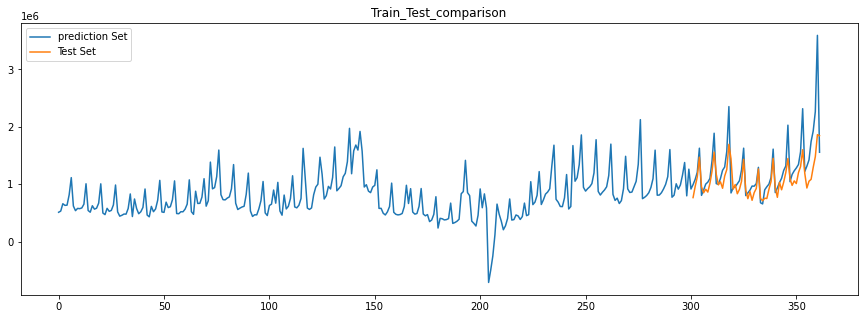

/tmp/ipykernel_586722/1618493330.py:118: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics = df_metrics.append(df_metrics_results,ignore_index = True)


In [64]:
model1,result1 = model_construction1(df_total1)

In [65]:
result1

,explained_variance,MAE,R^2,MSE,RMSE
0,0.6063,233300.5078,0.4694,1.265175e+11,355692.931


#### Negative Profit With Macro

06:01:43 - cmdstanpy - INFO - Chain [1] start processing
06:01:43 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:01:43 - cmdstanpy - INFO - Chain [1] start processing
06:01:43 - cmdstanpy - INFO - Chain [1] done processing
06:01:43 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
06:01:43 - cmdstanpy - INFO - Chain [1] start processing
06:01:44 - cmdstanpy - INFO - Chain [1] done processing
06:01:44 - cmdstanpy - INFO - Chain [1] start processing
06:01:44 - cmdstanpy - INFO - Chain [1] done processing
06:01:45 - cmdstanpy - INFO - Chain [1] start processing
06:01:45 - cmdstanpy - INFO - Chain [1] done processing
06:01:45 - cmdstanpy - INFO - Chain [1] start processing
06:01:45 - cmdstanpy - INFO - Chain [1] done processing
06:01:45 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
06:01:45 - cmdstanpy - INFO - Chain [1] start processing
06:01:46 - cmdstanpy - INFO - Chain [1] done processing
06

  0%|          | 0/6 [00:00<?, ?it/s]

06:01:47 - cmdstanpy - INFO - Chain [1] start processing
06:01:47 - cmdstanpy - INFO - Chain [1] done processing
06:01:47 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
06:01:47 - cmdstanpy - INFO - Chain [1] start processing
06:01:48 - cmdstanpy - INFO - Chain [1] done processing
06:01:48 - cmdstanpy - INFO - Chain [1] start processing
06:01:48 - cmdstanpy - INFO - Chain [1] done processing
06:01:48 - cmdstanpy - INFO - Chain [1] start processing
06:01:48 - cmdstanpy - INFO - Chain [1] done processing
06:01:49 - cmdstanpy - INFO - Chain [1] start processing
06:01:49 - cmdstanpy - INFO - Chain [1] done processing
06:01:49 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
06:01:49 - cmdstanpy - INFO - Chain [1] start processing
06:01:50 - cmdstanpy - INFO - Chain [1] done processing
06

  0%|          | 0/6 [00:00<?, ?it/s]

06:01:51 - cmdstanpy - INFO - Chain [1] start processing
06:01:51 - cmdstanpy - INFO - Chain [1] done processing
06:01:51 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
06:01:51 - cmdstanpy - INFO - Chain [1] start processing
06:01:52 - cmdstanpy - INFO - Chain [1] done processing
06:01:52 - cmdstanpy - INFO - Chain [1] start processing
06:01:52 - cmdstanpy - INFO - Chain [1] done processing
06:01:52 - cmdstanpy - INFO - Chain [1] start processing
06:01:52 - cmdstanpy - INFO - Chain [1] done processing
06:01:53 - cmdstanpy - INFO - Chain [1] start processing
06:01:53 - cmdstanpy - INFO - Chain [1] done processing
06:01:53 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
06:01:53 - cmdstanpy - INFO - Chain [1] start processing
06:01:54 - cmdstanpy - INFO - Chain [1] done processing
06

  0%|          | 0/6 [00:00<?, ?it/s]

06:01:55 - cmdstanpy - INFO - Chain [1] start processing
06:01:55 - cmdstanpy - INFO - Chain [1] done processing
06:01:55 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
06:01:55 - cmdstanpy - INFO - Chain [1] start processing
06:01:56 - cmdstanpy - INFO - Chain [1] done processing
06:01:56 - cmdstanpy - INFO - Chain [1] start processing
06:01:56 - cmdstanpy - INFO - Chain [1] done processing
06:01:56 - cmdstanpy - INFO - Chain [1] start processing
06:01:56 - cmdstanpy - INFO - Chain [1] done processing
06:01:57 - cmdstanpy - INFO - Chain [1] start processing
06:01:57 - cmdstanpy - INFO - Chain [1] done processing
06:01:57 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
06:01:57 - cmdstanpy - INFO - Chain [1] start processing
06:01:58 - cmdstanpy - INFO - Chain [1] done processing
06

  0%|          | 0/6 [00:00<?, ?it/s]

06:01:59 - cmdstanpy - INFO - Chain [1] start processing
06:01:59 - cmdstanpy - INFO - Chain [1] done processing
06:01:59 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
06:01:59 - cmdstanpy - INFO - Chain [1] start processing
06:01:59 - cmdstanpy - INFO - Chain [1] done processing
06:02:00 - cmdstanpy - INFO - Chain [1] start processing
06:02:00 - cmdstanpy - INFO - Chain [1] done processing
06:02:00 - cmdstanpy - INFO - Chain [1] start processing
06:02:00 - cmdstanpy - INFO - Chain [1] done processing
06:02:01 - cmdstanpy - INFO - Chain [1] start processing
06:02:01 - cmdstanpy - INFO - Chain [1] done processing
06:02:01 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
06:02:01 - cmdstanpy - INFO - Chain [1] start processing
06:02:01 - cmdstanpy - INFO - Chain [1] done processing
06

  0%|          | 0/6 [00:00<?, ?it/s]

06:02:03 - cmdstanpy - INFO - Chain [1] start processing
06:02:03 - cmdstanpy - INFO - Chain [1] done processing
06:02:03 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
06:02:03 - cmdstanpy - INFO - Chain [1] start processing
06:02:03 - cmdstanpy - INFO - Chain [1] done processing
06:02:03 - cmdstanpy - INFO - Chain [1] start processing
06:02:03 - cmdstanpy - INFO - Chain [1] done processing
06:02:04 - cmdstanpy - INFO - Chain [1] start processing
06:02:04 - cmdstanpy - INFO - Chain [1] done processing
06:02:04 - cmdstanpy - INFO - Chain [1] start processing
06:02:04 - cmdstanpy - INFO - Chain [1] done processing
06:02:04 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
06:02:04 - cmdstanpy - INFO - Chain [1] start processing
06:02:06 - cmdstanpy - INFO - Chain [1] done processing
06

  0%|          | 0/6 [00:00<?, ?it/s]

06:02:07 - cmdstanpy - INFO - Chain [1] start processing
06:02:07 - cmdstanpy - INFO - Chain [1] done processing
06:02:07 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
06:02:07 - cmdstanpy - INFO - Chain [1] start processing
06:02:08 - cmdstanpy - INFO - Chain [1] done processing
06:02:08 - cmdstanpy - INFO - Chain [1] start processing
06:02:08 - cmdstanpy - INFO - Chain [1] done processing
06:02:09 - cmdstanpy - INFO - Chain [1] start processing
06:02:09 - cmdstanpy - INFO - Chain [1] done processing
06:02:09 - cmdstanpy - INFO - Chain [1] start processing
06:02:09 - cmdstanpy - INFO - Chain [1] done processing
06:02:09 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
06:02:09 - cmdstanpy - INFO - Chain [1] start processing
06:02:09 - cmdstanpy - INFO - Chain [1] done processing
06

  0%|          | 0/6 [00:00<?, ?it/s]

06:02:11 - cmdstanpy - INFO - Chain [1] start processing
06:02:11 - cmdstanpy - INFO - Chain [1] done processing
06:02:11 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
06:02:11 - cmdstanpy - INFO - Chain [1] start processing
06:02:11 - cmdstanpy - INFO - Chain [1] done processing
06:02:12 - cmdstanpy - INFO - Chain [1] start processing
06:02:12 - cmdstanpy - INFO - Chain [1] done processing
06:02:12 - cmdstanpy - INFO - Chain [1] start processing
06:02:12 - cmdstanpy - INFO - Chain [1] done processing
06:02:13 - cmdstanpy - INFO - Chain [1] start processing
06:02:13 - cmdstanpy - INFO - Chain [1] done processing
06:02:13 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
06:02:13 - cmdstanpy - INFO - Chain [1] start processing
06:02:13 - cmdstanpy - INFO - Chain [1] done processing
06

  0%|          | 0/6 [00:00<?, ?it/s]

06:02:14 - cmdstanpy - INFO - Chain [1] start processing
06:02:14 - cmdstanpy - INFO - Chain [1] done processing
06:02:14 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
06:02:14 - cmdstanpy - INFO - Chain [1] start processing
06:02:15 - cmdstanpy - INFO - Chain [1] done processing
06:02:15 - cmdstanpy - INFO - Chain [1] start processing
06:02:16 - cmdstanpy - INFO - Chain [1] done processing
06:02:16 - cmdstanpy - INFO - Chain [1] start processing
06:02:16 - cmdstanpy - INFO - Chain [1] done processing
06:02:16 - cmdstanpy - INFO - Chain [1] start processing
06:02:16 - cmdstanpy - INFO - Chain [1] done processing
06:02:16 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
06:02:16 - cmdstanpy - INFO - Chain [1] start processing
06:02:17 - cmdstanpy - INFO - Chain [1] done processing
06

  0%|          | 0/6 [00:00<?, ?it/s]

06:02:18 - cmdstanpy - INFO - Chain [1] start processing
06:02:18 - cmdstanpy - INFO - Chain [1] done processing
06:02:18 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
06:02:18 - cmdstanpy - INFO - Chain [1] start processing
06:02:19 - cmdstanpy - INFO - Chain [1] done processing
06:02:19 - cmdstanpy - INFO - Chain [1] start processing
06:02:19 - cmdstanpy - INFO - Chain [1] done processing
06:02:20 - cmdstanpy - INFO - Chain [1] start processing
06:02:20 - cmdstanpy - INFO - Chain [1] done processing
06:02:20 - cmdstanpy - INFO - Chain [1] start processing
06:02:20 - cmdstanpy - INFO - Chain [1] done processing
06:02:20 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
06:02:20 - cmdstanpy - INFO - Chain [1] start processing
06:02:21 - cmdstanpy - INFO - Chain [1] done processing
06

  0%|          | 0/6 [00:00<?, ?it/s]

06:02:22 - cmdstanpy - INFO - Chain [1] start processing
06:02:22 - cmdstanpy - INFO - Chain [1] done processing
06:02:22 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
06:02:22 - cmdstanpy - INFO - Chain [1] start processing
06:02:23 - cmdstanpy - INFO - Chain [1] done processing
06:02:23 - cmdstanpy - INFO - Chain [1] start processing
06:02:23 - cmdstanpy - INFO - Chain [1] done processing
06:02:23 - cmdstanpy - INFO - Chain [1] start processing
06:02:23 - cmdstanpy - INFO - Chain [1] done processing
06:02:24 - cmdstanpy - INFO - Chain [1] start processing
06:02:24 - cmdstanpy - INFO - Chain [1] done processing
06:02:24 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
06:02:24 - cmdstanpy - INFO - Chain [1] start processing
06:02:24 - cmdstanpy - INFO - Chain [1] done processing
06

  0%|          | 0/6 [00:00<?, ?it/s]

06:02:26 - cmdstanpy - INFO - Chain [1] start processing
06:02:26 - cmdstanpy - INFO - Chain [1] done processing
06:02:26 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
06:02:26 - cmdstanpy - INFO - Chain [1] start processing
06:02:26 - cmdstanpy - INFO - Chain [1] done processing
06:02:27 - cmdstanpy - INFO - Chain [1] start processing
06:02:27 - cmdstanpy - INFO - Chain [1] done processing
06:02:27 - cmdstanpy - INFO - Chain [1] start processing
06:02:27 - cmdstanpy - INFO - Chain [1] done processing
06:02:28 - cmdstanpy - INFO - Chain [1] start processing
06:02:28 - cmdstanpy - INFO - Chain [1] done processing
06:02:28 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
06:02:28 - cmdstanpy - INFO - Chain [1] start processing
06:02:28 - cmdstanpy - INFO - Chain [1] done processing
06

  0%|          | 0/6 [00:00<?, ?it/s]

06:02:29 - cmdstanpy - INFO - Chain [1] start processing
06:02:30 - cmdstanpy - INFO - Chain [1] done processing
06:02:30 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
06:02:30 - cmdstanpy - INFO - Chain [1] start processing
06:02:30 - cmdstanpy - INFO - Chain [1] done processing
06:02:31 - cmdstanpy - INFO - Chain [1] start processing
06:02:31 - cmdstanpy - INFO - Chain [1] done processing
06:02:31 - cmdstanpy - INFO - Chain [1] start processing
06:02:31 - cmdstanpy - INFO - Chain [1] done processing
06:02:31 - cmdstanpy - INFO - Chain [1] start processing
06:02:31 - cmdstanpy - INFO - Chain [1] done processing
06:02:31 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
06:02:31 - cmdstanpy - INFO - Chain [1] start processing
06:02:32 - cmdstanpy - INFO - Chain [1] done processing
06

  0%|          | 0/6 [00:00<?, ?it/s]

06:02:33 - cmdstanpy - INFO - Chain [1] start processing
06:02:33 - cmdstanpy - INFO - Chain [1] done processing
06:02:33 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
06:02:33 - cmdstanpy - INFO - Chain [1] start processing
06:02:34 - cmdstanpy - INFO - Chain [1] done processing
06:02:34 - cmdstanpy - INFO - Chain [1] start processing
06:02:34 - cmdstanpy - INFO - Chain [1] done processing
06:02:35 - cmdstanpy - INFO - Chain [1] start processing
06:02:35 - cmdstanpy - INFO - Chain [1] done processing
06:02:35 - cmdstanpy - INFO - Chain [1] start processing
06:02:35 - cmdstanpy - INFO - Chain [1] done processing
06:02:35 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
06:02:35 - cmdstanpy - INFO - Chain [1] start processing
06:02:36 - cmdstanpy - INFO - Chain [1] done processing
06

  0%|          | 0/6 [00:00<?, ?it/s]

06:02:37 - cmdstanpy - INFO - Chain [1] start processing
06:02:37 - cmdstanpy - INFO - Chain [1] done processing
06:02:37 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
06:02:37 - cmdstanpy - INFO - Chain [1] start processing
06:02:38 - cmdstanpy - INFO - Chain [1] done processing
06:02:38 - cmdstanpy - INFO - Chain [1] start processing
06:02:38 - cmdstanpy - INFO - Chain [1] done processing
06:02:39 - cmdstanpy - INFO - Chain [1] start processing
06:02:39 - cmdstanpy - INFO - Chain [1] done processing
06:02:39 - cmdstanpy - INFO - Chain [1] start processing
06:02:39 - cmdstanpy - INFO - Chain [1] done processing
06:02:39 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
06:02:39 - cmdstanpy - INFO - Chain [1] start processing
06:02:40 - cmdstanpy - INFO - Chain [1] done processing
06

  0%|          | 0/6 [00:00<?, ?it/s]

06:02:41 - cmdstanpy - INFO - Chain [1] start processing
06:02:41 - cmdstanpy - INFO - Chain [1] done processing
06:02:41 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
06:02:41 - cmdstanpy - INFO - Chain [1] start processing
06:02:42 - cmdstanpy - INFO - Chain [1] done processing
06:02:42 - cmdstanpy - INFO - Chain [1] start processing
06:02:42 - cmdstanpy - INFO - Chain [1] done processing
06:02:42 - cmdstanpy - INFO - Chain [1] start processing
06:02:42 - cmdstanpy - INFO - Chain [1] done processing
06:02:43 - cmdstanpy - INFO - Chain [1] start processing
06:02:43 - cmdstanpy - INFO - Chain [1] done processing
06:02:43 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
06:02:43 - cmdstanpy - INFO - Chain [1] start processing
06:02:43 - cmdstanpy - INFO - Chain [1] done processing
06

  0%|          | 0/6 [00:00<?, ?it/s]

06:02:45 - cmdstanpy - INFO - Chain [1] start processing
06:02:45 - cmdstanpy - INFO - Chain [1] done processing
06:02:45 - cmdstanpy - INFO - Chain [1] start processing
06:02:45 - cmdstanpy - INFO - Chain [1] done processing
06:02:46 - cmdstanpy - INFO - Chain [1] start processing
06:02:46 - cmdstanpy - INFO - Chain [1] done processing
06:02:46 - cmdstanpy - INFO - Chain [1] start processing
06:02:46 - cmdstanpy - INFO - Chain [1] done processing
06:02:46 - cmdstanpy - INFO - Chain [1] start processing
06:02:46 - cmdstanpy - INFO - Chain [1] done processing
06:02:47 - cmdstanpy - INFO - Chain [1] start processing
06:02:47 - cmdstanpy - INFO - Chain [1] done processing
06:02:47 - cmdstanpy - INFO - Chain [1] start processing
06:02:47 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:02:47 - cmdstanpy - INFO - Chain [1] start processing
06:02:48 - cmdstanpy - INFO - Chain [1] done processing
06:02:48 - cmdstanpy - INFO - Chain [1] start processing
06:02:48 - cmdstanpy - INFO - Chain [1] done processing
06:02:48 - cmdstanpy - INFO - Chain [1] start processing
06:02:48 - cmdstanpy - INFO - Chain [1] done processing
06:02:48 - cmdstanpy - INFO - Chain [1] start processing
06:02:48 - cmdstanpy - INFO - Chain [1] done processing
06:02:49 - cmdstanpy - INFO - Chain [1] start processing
06:02:49 - cmdstanpy - INFO - Chain [1] done processing
06:02:49 - cmdstanpy - INFO - Chain [1] start processing
06:02:49 - cmdstanpy - INFO - Chain [1] done processing
06:02:50 - cmdstanpy - INFO - Chain [1] start processing
06:02:50 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:02:50 - cmdstanpy - INFO - Chain [1] start processing
06:02:50 - cmdstanpy - INFO - Chain [1] done processing
06:02:50 - cmdstanpy - INFO - Chain [1] start processing
06:02:50 - cmdstanpy - INFO - Chain [1] done processing
06:02:51 - cmdstanpy - INFO - Chain [1] start processing
06:02:51 - cmdstanpy - INFO - Chain [1] done processing
06:02:51 - cmdstanpy - INFO - Chain [1] start processing
06:02:51 - cmdstanpy - INFO - Chain [1] done processing
06:02:52 - cmdstanpy - INFO - Chain [1] start processing
06:02:52 - cmdstanpy - INFO - Chain [1] done processing
06:02:52 - cmdstanpy - INFO - Chain [1] start processing
06:02:52 - cmdstanpy - INFO - Chain [1] done processing
06:02:53 - cmdstanpy - INFO - Chain [1] start processing
06:02:53 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:02:53 - cmdstanpy - INFO - Chain [1] start processing
06:02:53 - cmdstanpy - INFO - Chain [1] done processing
06:02:53 - cmdstanpy - INFO - Chain [1] start processing
06:02:53 - cmdstanpy - INFO - Chain [1] done processing
06:02:53 - cmdstanpy - INFO - Chain [1] start processing
06:02:53 - cmdstanpy - INFO - Chain [1] done processing
06:02:54 - cmdstanpy - INFO - Chain [1] start processing
06:02:54 - cmdstanpy - INFO - Chain [1] done processing
06:02:54 - cmdstanpy - INFO - Chain [1] start processing
06:02:54 - cmdstanpy - INFO - Chain [1] done processing
06:02:55 - cmdstanpy - INFO - Chain [1] start processing
06:02:55 - cmdstanpy - INFO - Chain [1] done processing
06:02:55 - cmdstanpy - INFO - Chain [1] start processing
06:02:55 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:02:55 - cmdstanpy - INFO - Chain [1] start processing
06:02:55 - cmdstanpy - INFO - Chain [1] done processing
06:02:56 - cmdstanpy - INFO - Chain [1] start processing
06:02:56 - cmdstanpy - INFO - Chain [1] done processing
06:02:56 - cmdstanpy - INFO - Chain [1] start processing
06:02:56 - cmdstanpy - INFO - Chain [1] done processing
06:02:57 - cmdstanpy - INFO - Chain [1] start processing
06:02:57 - cmdstanpy - INFO - Chain [1] done processing
06:02:57 - cmdstanpy - INFO - Chain [1] start processing
06:02:57 - cmdstanpy - INFO - Chain [1] done processing
06:02:57 - cmdstanpy - INFO - Chain [1] start processing
06:02:57 - cmdstanpy - INFO - Chain [1] done processing
06:02:58 - cmdstanpy - INFO - Chain [1] start processing
06:02:58 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:02:58 - cmdstanpy - INFO - Chain [1] start processing
06:02:58 - cmdstanpy - INFO - Chain [1] done processing
06:02:58 - cmdstanpy - INFO - Chain [1] start processing
06:02:58 - cmdstanpy - INFO - Chain [1] done processing
06:02:59 - cmdstanpy - INFO - Chain [1] start processing
06:02:59 - cmdstanpy - INFO - Chain [1] done processing
06:02:59 - cmdstanpy - INFO - Chain [1] start processing
06:02:59 - cmdstanpy - INFO - Chain [1] done processing
06:02:59 - cmdstanpy - INFO - Chain [1] start processing
06:02:59 - cmdstanpy - INFO - Chain [1] done processing
06:03:00 - cmdstanpy - INFO - Chain [1] start processing
06:03:00 - cmdstanpy - INFO - Chain [1] done processing
06:03:00 - cmdstanpy - INFO - Chain [1] start processing
06:03:00 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:03:01 - cmdstanpy - INFO - Chain [1] start processing
06:03:01 - cmdstanpy - INFO - Chain [1] done processing
06:03:01 - cmdstanpy - INFO - Chain [1] start processing
06:03:01 - cmdstanpy - INFO - Chain [1] done processing
06:03:01 - cmdstanpy - INFO - Chain [1] start processing
06:03:01 - cmdstanpy - INFO - Chain [1] done processing
06:03:02 - cmdstanpy - INFO - Chain [1] start processing
06:03:02 - cmdstanpy - INFO - Chain [1] done processing
06:03:02 - cmdstanpy - INFO - Chain [1] start processing
06:03:02 - cmdstanpy - INFO - Chain [1] done processing
06:03:02 - cmdstanpy - INFO - Chain [1] start processing
06:03:03 - cmdstanpy - INFO - Chain [1] done processing
06:03:03 - cmdstanpy - INFO - Chain [1] start processing
06:03:03 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:03:03 - cmdstanpy - INFO - Chain [1] start processing
06:03:03 - cmdstanpy - INFO - Chain [1] done processing
06:03:04 - cmdstanpy - INFO - Chain [1] start processing
06:03:04 - cmdstanpy - INFO - Chain [1] done processing
06:03:04 - cmdstanpy - INFO - Chain [1] start processing
06:03:04 - cmdstanpy - INFO - Chain [1] done processing
06:03:04 - cmdstanpy - INFO - Chain [1] start processing
06:03:04 - cmdstanpy - INFO - Chain [1] done processing
06:03:05 - cmdstanpy - INFO - Chain [1] start processing
06:03:05 - cmdstanpy - INFO - Chain [1] done processing
06:03:05 - cmdstanpy - INFO - Chain [1] start processing
06:03:05 - cmdstanpy - INFO - Chain [1] done processing
06:03:06 - cmdstanpy - INFO - Chain [1] start processing
06:03:06 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:03:06 - cmdstanpy - INFO - Chain [1] start processing
06:03:06 - cmdstanpy - INFO - Chain [1] done processing
06:03:06 - cmdstanpy - INFO - Chain [1] start processing
06:03:06 - cmdstanpy - INFO - Chain [1] done processing
06:03:06 - cmdstanpy - INFO - Chain [1] start processing
06:03:07 - cmdstanpy - INFO - Chain [1] done processing
06:03:07 - cmdstanpy - INFO - Chain [1] start processing
06:03:07 - cmdstanpy - INFO - Chain [1] done processing
06:03:07 - cmdstanpy - INFO - Chain [1] start processing
06:03:07 - cmdstanpy - INFO - Chain [1] done processing
06:03:08 - cmdstanpy - INFO - Chain [1] start processing
06:03:08 - cmdstanpy - INFO - Chain [1] done processing
06:03:08 - cmdstanpy - INFO - Chain [1] start processing
06:03:08 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:03:08 - cmdstanpy - INFO - Chain [1] start processing
06:03:08 - cmdstanpy - INFO - Chain [1] done processing
06:03:09 - cmdstanpy - INFO - Chain [1] start processing
06:03:09 - cmdstanpy - INFO - Chain [1] done processing
06:03:09 - cmdstanpy - INFO - Chain [1] start processing
06:03:09 - cmdstanpy - INFO - Chain [1] done processing
06:03:10 - cmdstanpy - INFO - Chain [1] start processing
06:03:10 - cmdstanpy - INFO - Chain [1] done processing
06:03:10 - cmdstanpy - INFO - Chain [1] start processing
06:03:10 - cmdstanpy - INFO - Chain [1] done processing
06:03:10 - cmdstanpy - INFO - Chain [1] start processing
06:03:10 - cmdstanpy - INFO - Chain [1] done processing
06:03:11 - cmdstanpy - INFO - Chain [1] start processing
06:03:11 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:03:11 - cmdstanpy - INFO - Chain [1] start processing
06:03:11 - cmdstanpy - INFO - Chain [1] done processing
06:03:11 - cmdstanpy - INFO - Chain [1] start processing
06:03:11 - cmdstanpy - INFO - Chain [1] done processing
06:03:12 - cmdstanpy - INFO - Chain [1] start processing
06:03:12 - cmdstanpy - INFO - Chain [1] done processing
06:03:12 - cmdstanpy - INFO - Chain [1] start processing
06:03:12 - cmdstanpy - INFO - Chain [1] done processing
06:03:13 - cmdstanpy - INFO - Chain [1] start processing
06:03:13 - cmdstanpy - INFO - Chain [1] done processing
06:03:13 - cmdstanpy - INFO - Chain [1] start processing
06:03:13 - cmdstanpy - INFO - Chain [1] done processing
06:03:13 - cmdstanpy - INFO - Chain [1] start processing
06:03:13 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:03:14 - cmdstanpy - INFO - Chain [1] start processing
06:03:14 - cmdstanpy - INFO - Chain [1] done processing
06:03:14 - cmdstanpy - INFO - Chain [1] start processing
06:03:14 - cmdstanpy - INFO - Chain [1] done processing
06:03:14 - cmdstanpy - INFO - Chain [1] start processing
06:03:14 - cmdstanpy - INFO - Chain [1] done processing
06:03:15 - cmdstanpy - INFO - Chain [1] start processing
06:03:15 - cmdstanpy - INFO - Chain [1] done processing
06:03:15 - cmdstanpy - INFO - Chain [1] start processing
06:03:15 - cmdstanpy - INFO - Chain [1] done processing
06:03:16 - cmdstanpy - INFO - Chain [1] start processing
06:03:16 - cmdstanpy - INFO - Chain [1] done processing
06:03:16 - cmdstanpy - INFO - Chain [1] start processing
06:03:16 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:03:16 - cmdstanpy - INFO - Chain [1] start processing
06:03:16 - cmdstanpy - INFO - Chain [1] done processing
06:03:17 - cmdstanpy - INFO - Chain [1] start processing
06:03:17 - cmdstanpy - INFO - Chain [1] done processing
06:03:17 - cmdstanpy - INFO - Chain [1] start processing
06:03:17 - cmdstanpy - INFO - Chain [1] done processing
06:03:17 - cmdstanpy - INFO - Chain [1] start processing
06:03:17 - cmdstanpy - INFO - Chain [1] done processing
06:03:18 - cmdstanpy - INFO - Chain [1] start processing
06:03:18 - cmdstanpy - INFO - Chain [1] done processing
06:03:18 - cmdstanpy - INFO - Chain [1] start processing
06:03:18 - cmdstanpy - INFO - Chain [1] done processing
06:03:19 - cmdstanpy - INFO - Chain [1] start processing
06:03:19 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:03:19 - cmdstanpy - INFO - Chain [1] start processing
06:03:19 - cmdstanpy - INFO - Chain [1] done processing
06:03:19 - cmdstanpy - INFO - Chain [1] start processing
06:03:19 - cmdstanpy - INFO - Chain [1] done processing
06:03:19 - cmdstanpy - INFO - Chain [1] start processing
06:03:20 - cmdstanpy - INFO - Chain [1] done processing
06:03:20 - cmdstanpy - INFO - Chain [1] start processing
06:03:20 - cmdstanpy - INFO - Chain [1] done processing
06:03:20 - cmdstanpy - INFO - Chain [1] start processing
06:03:20 - cmdstanpy - INFO - Chain [1] done processing
06:03:21 - cmdstanpy - INFO - Chain [1] start processing
06:03:21 - cmdstanpy - INFO - Chain [1] done processing
06:03:21 - cmdstanpy - INFO - Chain [1] start processing
06:03:21 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:03:21 - cmdstanpy - INFO - Chain [1] start processing
06:03:21 - cmdstanpy - INFO - Chain [1] done processing
06:03:22 - cmdstanpy - INFO - Chain [1] start processing
06:03:22 - cmdstanpy - INFO - Chain [1] done processing
06:03:22 - cmdstanpy - INFO - Chain [1] start processing
06:03:22 - cmdstanpy - INFO - Chain [1] done processing
06:03:23 - cmdstanpy - INFO - Chain [1] start processing
06:03:23 - cmdstanpy - INFO - Chain [1] done processing
06:03:23 - cmdstanpy - INFO - Chain [1] start processing
06:03:23 - cmdstanpy - INFO - Chain [1] done processing
06:03:24 - cmdstanpy - INFO - Chain [1] start processing
06:03:24 - cmdstanpy - INFO - Chain [1] done processing
06:03:24 - cmdstanpy - INFO - Chain [1] start processing
06:03:24 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:03:24 - cmdstanpy - INFO - Chain [1] start processing
06:03:24 - cmdstanpy - INFO - Chain [1] done processing
06:03:24 - cmdstanpy - INFO - Chain [1] start processing
06:03:25 - cmdstanpy - INFO - Chain [1] done processing
06:03:25 - cmdstanpy - INFO - Chain [1] start processing
06:03:25 - cmdstanpy - INFO - Chain [1] done processing
06:03:25 - cmdstanpy - INFO - Chain [1] start processing
06:03:25 - cmdstanpy - INFO - Chain [1] done processing
06:03:26 - cmdstanpy - INFO - Chain [1] start processing
06:03:26 - cmdstanpy - INFO - Chain [1] done processing
06:03:26 - cmdstanpy - INFO - Chain [1] start processing
06:03:26 - cmdstanpy - INFO - Chain [1] done processing
06:03:27 - cmdstanpy - INFO - Chain [1] start processing
06:03:27 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:03:27 - cmdstanpy - INFO - Chain [1] start processing
06:03:27 - cmdstanpy - INFO - Chain [1] done processing
06:03:27 - cmdstanpy - INFO - Chain [1] start processing
06:03:27 - cmdstanpy - INFO - Chain [1] done processing
06:03:28 - cmdstanpy - INFO - Chain [1] start processing
06:03:28 - cmdstanpy - INFO - Chain [1] done processing
06:03:28 - cmdstanpy - INFO - Chain [1] start processing
06:03:28 - cmdstanpy - INFO - Chain [1] done processing
06:03:28 - cmdstanpy - INFO - Chain [1] start processing
06:03:28 - cmdstanpy - INFO - Chain [1] done processing
06:03:29 - cmdstanpy - INFO - Chain [1] start processing
06:03:29 - cmdstanpy - INFO - Chain [1] done processing
06:03:29 - cmdstanpy - INFO - Chain [1] start processing
06:03:29 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:03:29 - cmdstanpy - INFO - Chain [1] start processing
06:03:30 - cmdstanpy - INFO - Chain [1] done processing
06:03:30 - cmdstanpy - INFO - Chain [1] start processing
06:03:30 - cmdstanpy - INFO - Chain [1] done processing
06:03:30 - cmdstanpy - INFO - Chain [1] start processing
06:03:30 - cmdstanpy - INFO - Chain [1] done processing
06:03:30 - cmdstanpy - INFO - Chain [1] start processing
06:03:31 - cmdstanpy - INFO - Chain [1] done processing
06:03:31 - cmdstanpy - INFO - Chain [1] start processing
06:03:31 - cmdstanpy - INFO - Chain [1] done processing
06:03:31 - cmdstanpy - INFO - Chain [1] start processing
06:03:31 - cmdstanpy - INFO - Chain [1] done processing
06:03:32 - cmdstanpy - INFO - Chain [1] start processing
06:03:32 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:03:32 - cmdstanpy - INFO - Chain [1] start processing
06:03:32 - cmdstanpy - INFO - Chain [1] done processing
06:03:32 - cmdstanpy - INFO - Chain [1] start processing
06:03:32 - cmdstanpy - INFO - Chain [1] done processing
06:03:33 - cmdstanpy - INFO - Chain [1] start processing
06:03:33 - cmdstanpy - INFO - Chain [1] done processing
06:03:33 - cmdstanpy - INFO - Chain [1] start processing
06:03:33 - cmdstanpy - INFO - Chain [1] done processing
06:03:34 - cmdstanpy - INFO - Chain [1] start processing
06:03:34 - cmdstanpy - INFO - Chain [1] done processing
06:03:34 - cmdstanpy - INFO - Chain [1] start processing
06:03:34 - cmdstanpy - INFO - Chain [1] done processing
06:03:34 - cmdstanpy - INFO - Chain [1] start processing
06:03:35 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:03:35 - cmdstanpy - INFO - Chain [1] start processing
06:03:35 - cmdstanpy - INFO - Chain [1] done processing
06:03:35 - cmdstanpy - INFO - Chain [1] start processing
06:03:35 - cmdstanpy - INFO - Chain [1] done processing
06:03:36 - cmdstanpy - INFO - Chain [1] start processing
06:03:36 - cmdstanpy - INFO - Chain [1] done processing
06:03:36 - cmdstanpy - INFO - Chain [1] start processing
06:03:36 - cmdstanpy - INFO - Chain [1] done processing
06:03:36 - cmdstanpy - INFO - Chain [1] start processing
06:03:36 - cmdstanpy - INFO - Chain [1] done processing
06:03:37 - cmdstanpy - INFO - Chain [1] start processing
06:03:37 - cmdstanpy - INFO - Chain [1] done processing
06:03:37 - cmdstanpy - INFO - Chain [1] start processing
06:03:37 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:03:37 - cmdstanpy - INFO - Chain [1] start processing
06:03:37 - cmdstanpy - INFO - Chain [1] done processing
06:03:38 - cmdstanpy - INFO - Chain [1] start processing
06:03:38 - cmdstanpy - INFO - Chain [1] done processing
06:03:38 - cmdstanpy - INFO - Chain [1] start processing
06:03:38 - cmdstanpy - INFO - Chain [1] done processing
06:03:39 - cmdstanpy - INFO - Chain [1] start processing
06:03:39 - cmdstanpy - INFO - Chain [1] done processing
06:03:39 - cmdstanpy - INFO - Chain [1] start processing
06:03:39 - cmdstanpy - INFO - Chain [1] done processing
06:03:39 - cmdstanpy - INFO - Chain [1] start processing
06:03:39 - cmdstanpy - INFO - Chain [1] done processing
06:03:40 - cmdstanpy - INFO - Chain [1] start processing
06:03:40 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:03:40 - cmdstanpy - INFO - Chain [1] start processing
06:03:40 - cmdstanpy - INFO - Chain [1] done processing
06:03:41 - cmdstanpy - INFO - Chain [1] start processing
06:03:41 - cmdstanpy - INFO - Chain [1] done processing
06:03:41 - cmdstanpy - INFO - Chain [1] start processing
06:03:41 - cmdstanpy - INFO - Chain [1] done processing
06:03:41 - cmdstanpy - INFO - Chain [1] start processing
06:03:41 - cmdstanpy - INFO - Chain [1] done processing
06:03:42 - cmdstanpy - INFO - Chain [1] start processing
06:03:42 - cmdstanpy - INFO - Chain [1] done processing
06:03:42 - cmdstanpy - INFO - Chain [1] start processing
06:03:42 - cmdstanpy - INFO - Chain [1] done processing
06:03:43 - cmdstanpy - INFO - Chain [1] start processing
06:03:43 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:03:43 - cmdstanpy - INFO - Chain [1] start processing
06:03:43 - cmdstanpy - INFO - Chain [1] done processing
06:03:43 - cmdstanpy - INFO - Chain [1] start processing
06:03:43 - cmdstanpy - INFO - Chain [1] done processing
06:03:44 - cmdstanpy - INFO - Chain [1] start processing
06:03:44 - cmdstanpy - INFO - Chain [1] done processing
06:03:44 - cmdstanpy - INFO - Chain [1] start processing
06:03:44 - cmdstanpy - INFO - Chain [1] done processing
06:03:44 - cmdstanpy - INFO - Chain [1] start processing
06:03:45 - cmdstanpy - INFO - Chain [1] done processing
06:03:45 - cmdstanpy - INFO - Chain [1] start processing
06:03:45 - cmdstanpy - INFO - Chain [1] done processing
06:03:45 - cmdstanpy - INFO - Chain [1] start processing
06:03:45 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:03:45 - cmdstanpy - INFO - Chain [1] start processing
06:03:45 - cmdstanpy - INFO - Chain [1] done processing
06:03:46 - cmdstanpy - INFO - Chain [1] start processing
06:03:46 - cmdstanpy - INFO - Chain [1] done processing
06:03:46 - cmdstanpy - INFO - Chain [1] start processing
06:03:46 - cmdstanpy - INFO - Chain [1] done processing
06:03:47 - cmdstanpy - INFO - Chain [1] start processing
06:03:47 - cmdstanpy - INFO - Chain [1] done processing
06:03:47 - cmdstanpy - INFO - Chain [1] start processing
06:03:47 - cmdstanpy - INFO - Chain [1] done processing
06:03:47 - cmdstanpy - INFO - Chain [1] start processing
06:03:47 - cmdstanpy - INFO - Chain [1] done processing
06:03:48 - cmdstanpy - INFO - Chain [1] start processing
06:03:48 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:03:48 - cmdstanpy - INFO - Chain [1] start processing
06:03:48 - cmdstanpy - INFO - Chain [1] done processing
06:03:49 - cmdstanpy - INFO - Chain [1] start processing
06:03:49 - cmdstanpy - INFO - Chain [1] done processing
06:03:49 - cmdstanpy - INFO - Chain [1] start processing
06:03:49 - cmdstanpy - INFO - Chain [1] done processing
06:03:49 - cmdstanpy - INFO - Chain [1] start processing
06:03:49 - cmdstanpy - INFO - Chain [1] done processing
06:03:50 - cmdstanpy - INFO - Chain [1] start processing
06:03:50 - cmdstanpy - INFO - Chain [1] done processing
06:03:50 - cmdstanpy - INFO - Chain [1] start processing
06:03:50 - cmdstanpy - INFO - Chain [1] done processing
06:03:51 - cmdstanpy - INFO - Chain [1] start processing
06:03:51 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:03:51 - cmdstanpy - INFO - Chain [1] start processing
06:03:51 - cmdstanpy - INFO - Chain [1] done processing
06:03:51 - cmdstanpy - INFO - Chain [1] start processing
06:03:51 - cmdstanpy - INFO - Chain [1] done processing
06:03:52 - cmdstanpy - INFO - Chain [1] start processing
06:03:52 - cmdstanpy - INFO - Chain [1] done processing
06:03:52 - cmdstanpy - INFO - Chain [1] start processing
06:03:52 - cmdstanpy - INFO - Chain [1] done processing
06:03:53 - cmdstanpy - INFO - Chain [1] start processing
06:03:53 - cmdstanpy - INFO - Chain [1] done processing
06:03:53 - cmdstanpy - INFO - Chain [1] start processing
06:03:53 - cmdstanpy - INFO - Chain [1] done processing
06:03:54 - cmdstanpy - INFO - Chain [1] start processing
06:03:54 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:03:54 - cmdstanpy - INFO - Chain [1] start processing
06:03:54 - cmdstanpy - INFO - Chain [1] done processing
06:03:54 - cmdstanpy - INFO - Chain [1] start processing
06:03:54 - cmdstanpy - INFO - Chain [1] done processing
06:03:54 - cmdstanpy - INFO - Chain [1] start processing
06:03:54 - cmdstanpy - INFO - Chain [1] done processing
06:03:55 - cmdstanpy - INFO - Chain [1] start processing
06:03:55 - cmdstanpy - INFO - Chain [1] done processing
06:03:55 - cmdstanpy - INFO - Chain [1] start processing
06:03:55 - cmdstanpy - INFO - Chain [1] done processing
06:03:56 - cmdstanpy - INFO - Chain [1] start processing
06:03:56 - cmdstanpy - INFO - Chain [1] done processing
06:03:56 - cmdstanpy - INFO - Chain [1] start processing
06:03:56 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:03:56 - cmdstanpy - INFO - Chain [1] start processing
06:03:56 - cmdstanpy - INFO - Chain [1] done processing
06:03:57 - cmdstanpy - INFO - Chain [1] start processing
06:03:57 - cmdstanpy - INFO - Chain [1] done processing
06:03:57 - cmdstanpy - INFO - Chain [1] start processing
06:03:57 - cmdstanpy - INFO - Chain [1] done processing
06:03:58 - cmdstanpy - INFO - Chain [1] start processing
06:03:58 - cmdstanpy - INFO - Chain [1] done processing
06:03:58 - cmdstanpy - INFO - Chain [1] start processing
06:03:58 - cmdstanpy - INFO - Chain [1] done processing
06:03:58 - cmdstanpy - INFO - Chain [1] start processing
06:03:58 - cmdstanpy - INFO - Chain [1] done processing
06:03:59 - cmdstanpy - INFO - Chain [1] start processing
06:03:59 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:03:59 - cmdstanpy - INFO - Chain [1] start processing
06:03:59 - cmdstanpy - INFO - Chain [1] done processing
06:03:59 - cmdstanpy - INFO - Chain [1] start processing
06:04:00 - cmdstanpy - INFO - Chain [1] done processing
06:04:00 - cmdstanpy - INFO - Chain [1] start processing
06:04:00 - cmdstanpy - INFO - Chain [1] done processing
06:04:00 - cmdstanpy - INFO - Chain [1] start processing
06:04:00 - cmdstanpy - INFO - Chain [1] done processing
06:04:01 - cmdstanpy - INFO - Chain [1] start processing
06:04:01 - cmdstanpy - INFO - Chain [1] done processing
06:04:01 - cmdstanpy - INFO - Chain [1] start processing
06:04:01 - cmdstanpy - INFO - Chain [1] done processing
06:04:02 - cmdstanpy - INFO - Chain [1] start processing
06:04:02 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:04:02 - cmdstanpy - INFO - Chain [1] start processing
06:04:02 - cmdstanpy - INFO - Chain [1] done processing
06:04:02 - cmdstanpy - INFO - Chain [1] start processing
06:04:02 - cmdstanpy - INFO - Chain [1] done processing
06:04:02 - cmdstanpy - INFO - Chain [1] start processing
06:04:02 - cmdstanpy - INFO - Chain [1] done processing
06:04:03 - cmdstanpy - INFO - Chain [1] start processing
06:04:03 - cmdstanpy - INFO - Chain [1] done processing
06:04:03 - cmdstanpy - INFO - Chain [1] start processing
06:04:03 - cmdstanpy - INFO - Chain [1] done processing
06:04:04 - cmdstanpy - INFO - Chain [1] start processing
06:04:04 - cmdstanpy - INFO - Chain [1] done processing
06:04:04 - cmdstanpy - INFO - Chain [1] start processing
06:04:04 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:04:04 - cmdstanpy - INFO - Chain [1] start processing
06:04:04 - cmdstanpy - INFO - Chain [1] done processing
06:04:05 - cmdstanpy - INFO - Chain [1] start processing
06:04:05 - cmdstanpy - INFO - Chain [1] done processing
06:04:05 - cmdstanpy - INFO - Chain [1] start processing
06:04:05 - cmdstanpy - INFO - Chain [1] done processing
06:04:06 - cmdstanpy - INFO - Chain [1] start processing
06:04:06 - cmdstanpy - INFO - Chain [1] done processing
06:04:06 - cmdstanpy - INFO - Chain [1] start processing
06:04:06 - cmdstanpy - INFO - Chain [1] done processing
06:04:06 - cmdstanpy - INFO - Chain [1] start processing
06:04:06 - cmdstanpy - INFO - Chain [1] done processing
06:04:07 - cmdstanpy - INFO - Chain [1] start processing
06:04:07 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:04:07 - cmdstanpy - INFO - Chain [1] start processing
06:04:07 - cmdstanpy - INFO - Chain [1] done processing
06:04:08 - cmdstanpy - INFO - Chain [1] start processing
06:04:08 - cmdstanpy - INFO - Chain [1] done processing
06:04:08 - cmdstanpy - INFO - Chain [1] start processing
06:04:08 - cmdstanpy - INFO - Chain [1] done processing
06:04:08 - cmdstanpy - INFO - Chain [1] start processing
06:04:08 - cmdstanpy - INFO - Chain [1] done processing
06:04:09 - cmdstanpy - INFO - Chain [1] start processing
06:04:09 - cmdstanpy - INFO - Chain [1] done processing
06:04:09 - cmdstanpy - INFO - Chain [1] start processing
06:04:09 - cmdstanpy - INFO - Chain [1] done processing
06:04:10 - cmdstanpy - INFO - Chain [1] start processing
06:04:10 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:04:10 - cmdstanpy - INFO - Chain [1] start processing
06:04:10 - cmdstanpy - INFO - Chain [1] done processing
06:04:10 - cmdstanpy - INFO - Chain [1] start processing
06:04:10 - cmdstanpy - INFO - Chain [1] done processing
06:04:11 - cmdstanpy - INFO - Chain [1] start processing
06:04:11 - cmdstanpy - INFO - Chain [1] done processing
06:04:11 - cmdstanpy - INFO - Chain [1] start processing
06:04:11 - cmdstanpy - INFO - Chain [1] done processing
06:04:12 - cmdstanpy - INFO - Chain [1] start processing
06:04:12 - cmdstanpy - INFO - Chain [1] done processing
06:04:12 - cmdstanpy - INFO - Chain [1] start processing
06:04:12 - cmdstanpy - INFO - Chain [1] done processing
06:04:13 - cmdstanpy - INFO - Chain [1] start processing
06:04:13 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:04:13 - cmdstanpy - INFO - Chain [1] start processing
06:04:13 - cmdstanpy - INFO - Chain [1] done processing
06:04:13 - cmdstanpy - INFO - Chain [1] start processing
06:04:13 - cmdstanpy - INFO - Chain [1] done processing
06:04:14 - cmdstanpy - INFO - Chain [1] start processing
06:04:14 - cmdstanpy - INFO - Chain [1] done processing
06:04:14 - cmdstanpy - INFO - Chain [1] start processing
06:04:14 - cmdstanpy - INFO - Chain [1] done processing
06:04:14 - cmdstanpy - INFO - Chain [1] start processing
06:04:15 - cmdstanpy - INFO - Chain [1] done processing
06:04:15 - cmdstanpy - INFO - Chain [1] start processing
06:04:15 - cmdstanpy - INFO - Chain [1] done processing
06:04:16 - cmdstanpy - INFO - Chain [1] start processing
06:04:16 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:04:16 - cmdstanpy - INFO - Chain [1] start processing
06:04:16 - cmdstanpy - INFO - Chain [1] done processing
06:04:16 - cmdstanpy - INFO - Chain [1] start processing
06:04:16 - cmdstanpy - INFO - Chain [1] done processing
06:04:17 - cmdstanpy - INFO - Chain [1] start processing
06:04:17 - cmdstanpy - INFO - Chain [1] done processing
06:04:17 - cmdstanpy - INFO - Chain [1] start processing
06:04:17 - cmdstanpy - INFO - Chain [1] done processing
06:04:18 - cmdstanpy - INFO - Chain [1] start processing
06:04:18 - cmdstanpy - INFO - Chain [1] done processing
06:04:18 - cmdstanpy - INFO - Chain [1] start processing
06:04:18 - cmdstanpy - INFO - Chain [1] done processing
06:04:18 - cmdstanpy - INFO - Chain [1] start processing
06:04:19 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:04:19 - cmdstanpy - INFO - Chain [1] start processing
06:04:19 - cmdstanpy - INFO - Chain [1] done processing
06:04:19 - cmdstanpy - INFO - Chain [1] start processing
06:04:19 - cmdstanpy - INFO - Chain [1] done processing
06:04:20 - cmdstanpy - INFO - Chain [1] start processing
06:04:20 - cmdstanpy - INFO - Chain [1] done processing
06:04:20 - cmdstanpy - INFO - Chain [1] start processing
06:04:20 - cmdstanpy - INFO - Chain [1] done processing
06:04:20 - cmdstanpy - INFO - Chain [1] start processing
06:04:20 - cmdstanpy - INFO - Chain [1] done processing
06:04:21 - cmdstanpy - INFO - Chain [1] start processing
06:04:21 - cmdstanpy - INFO - Chain [1] done processing
06:04:22 - cmdstanpy - INFO - Chain [1] start processing
06:04:22 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:04:22 - cmdstanpy - INFO - Chain [1] start processing
06:04:22 - cmdstanpy - INFO - Chain [1] done processing
06:04:22 - cmdstanpy - INFO - Chain [1] start processing
06:04:22 - cmdstanpy - INFO - Chain [1] done processing
06:04:23 - cmdstanpy - INFO - Chain [1] start processing
06:04:23 - cmdstanpy - INFO - Chain [1] done processing
06:04:23 - cmdstanpy - INFO - Chain [1] start processing
06:04:23 - cmdstanpy - INFO - Chain [1] done processing
06:04:24 - cmdstanpy - INFO - Chain [1] start processing
06:04:24 - cmdstanpy - INFO - Chain [1] done processing
06:04:24 - cmdstanpy - INFO - Chain [1] start processing
06:04:24 - cmdstanpy - INFO - Chain [1] done processing
06:04:25 - cmdstanpy - INFO - Chain [1] start processing
06:04:25 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:04:25 - cmdstanpy - INFO - Chain [1] start processing
06:04:25 - cmdstanpy - INFO - Chain [1] done processing
06:04:25 - cmdstanpy - INFO - Chain [1] start processing
06:04:25 - cmdstanpy - INFO - Chain [1] done processing
06:04:26 - cmdstanpy - INFO - Chain [1] start processing
06:04:26 - cmdstanpy - INFO - Chain [1] done processing
06:04:26 - cmdstanpy - INFO - Chain [1] start processing
06:04:26 - cmdstanpy - INFO - Chain [1] done processing
06:04:27 - cmdstanpy - INFO - Chain [1] start processing
06:04:27 - cmdstanpy - INFO - Chain [1] done processing
06:04:27 - cmdstanpy - INFO - Chain [1] start processing
06:04:27 - cmdstanpy - INFO - Chain [1] done processing
06:04:27 - cmdstanpy - INFO - Chain [1] start processing
06:04:28 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:04:28 - cmdstanpy - INFO - Chain [1] start processing
06:04:28 - cmdstanpy - INFO - Chain [1] done processing
06:04:28 - cmdstanpy - INFO - Chain [1] start processing
06:04:28 - cmdstanpy - INFO - Chain [1] done processing
06:04:29 - cmdstanpy - INFO - Chain [1] start processing
06:04:29 - cmdstanpy - INFO - Chain [1] done processing
06:04:29 - cmdstanpy - INFO - Chain [1] start processing
06:04:29 - cmdstanpy - INFO - Chain [1] done processing
06:04:30 - cmdstanpy - INFO - Chain [1] start processing
06:04:30 - cmdstanpy - INFO - Chain [1] done processing
06:04:30 - cmdstanpy - INFO - Chain [1] start processing
06:04:30 - cmdstanpy - INFO - Chain [1] done processing
06:04:31 - cmdstanpy - INFO - Chain [1] start processing
06:04:31 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:04:31 - cmdstanpy - INFO - Chain [1] start processing
06:04:31 - cmdstanpy - INFO - Chain [1] done processing
06:04:31 - cmdstanpy - INFO - Chain [1] start processing
06:04:31 - cmdstanpy - INFO - Chain [1] done processing
06:04:32 - cmdstanpy - INFO - Chain [1] start processing
06:04:32 - cmdstanpy - INFO - Chain [1] done processing
06:04:32 - cmdstanpy - INFO - Chain [1] start processing
06:04:32 - cmdstanpy - INFO - Chain [1] done processing
06:04:33 - cmdstanpy - INFO - Chain [1] start processing
06:04:33 - cmdstanpy - INFO - Chain [1] done processing
06:04:33 - cmdstanpy - INFO - Chain [1] start processing
06:04:33 - cmdstanpy - INFO - Chain [1] done processing
06:04:34 - cmdstanpy - INFO - Chain [1] start processing
06:04:34 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:04:34 - cmdstanpy - INFO - Chain [1] start processing
06:04:34 - cmdstanpy - INFO - Chain [1] done processing
06:04:34 - cmdstanpy - INFO - Chain [1] start processing
06:04:34 - cmdstanpy - INFO - Chain [1] done processing
06:04:35 - cmdstanpy - INFO - Chain [1] start processing
06:04:35 - cmdstanpy - INFO - Chain [1] done processing
06:04:35 - cmdstanpy - INFO - Chain [1] start processing
06:04:35 - cmdstanpy - INFO - Chain [1] done processing
06:04:36 - cmdstanpy - INFO - Chain [1] start processing
06:04:36 - cmdstanpy - INFO - Chain [1] done processing
06:04:36 - cmdstanpy - INFO - Chain [1] start processing
06:04:36 - cmdstanpy - INFO - Chain [1] done processing
06:04:37 - cmdstanpy - INFO - Chain [1] start processing
06:04:37 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:04:37 - cmdstanpy - INFO - Chain [1] start processing
06:04:37 - cmdstanpy - INFO - Chain [1] done processing
06:04:37 - cmdstanpy - INFO - Chain [1] start processing
06:04:37 - cmdstanpy - INFO - Chain [1] done processing
06:04:38 - cmdstanpy - INFO - Chain [1] start processing
06:04:38 - cmdstanpy - INFO - Chain [1] done processing
06:04:38 - cmdstanpy - INFO - Chain [1] start processing
06:04:38 - cmdstanpy - INFO - Chain [1] done processing
06:04:39 - cmdstanpy - INFO - Chain [1] start processing
06:04:39 - cmdstanpy - INFO - Chain [1] done processing
06:04:39 - cmdstanpy - INFO - Chain [1] start processing
06:04:39 - cmdstanpy - INFO - Chain [1] done processing
06:04:40 - cmdstanpy - INFO - Chain [1] start processing
06:04:40 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:04:40 - cmdstanpy - INFO - Chain [1] start processing
06:04:40 - cmdstanpy - INFO - Chain [1] done processing
06:04:40 - cmdstanpy - INFO - Chain [1] start processing
06:04:40 - cmdstanpy - INFO - Chain [1] done processing
06:04:41 - cmdstanpy - INFO - Chain [1] start processing
06:04:41 - cmdstanpy - INFO - Chain [1] done processing
06:04:41 - cmdstanpy - INFO - Chain [1] start processing
06:04:41 - cmdstanpy - INFO - Chain [1] done processing
06:04:42 - cmdstanpy - INFO - Chain [1] start processing
06:04:42 - cmdstanpy - INFO - Chain [1] done processing
06:04:42 - cmdstanpy - INFO - Chain [1] start processing
06:04:42 - cmdstanpy - INFO - Chain [1] done processing
06:04:43 - cmdstanpy - INFO - Chain [1] start processing
06:04:43 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:04:43 - cmdstanpy - INFO - Chain [1] start processing
06:04:43 - cmdstanpy - INFO - Chain [1] done processing
06:04:44 - cmdstanpy - INFO - Chain [1] start processing
06:04:44 - cmdstanpy - INFO - Chain [1] done processing
06:04:44 - cmdstanpy - INFO - Chain [1] start processing
06:04:44 - cmdstanpy - INFO - Chain [1] done processing
06:04:44 - cmdstanpy - INFO - Chain [1] start processing
06:04:44 - cmdstanpy - INFO - Chain [1] done processing
06:04:45 - cmdstanpy - INFO - Chain [1] start processing
06:04:45 - cmdstanpy - INFO - Chain [1] done processing
06:04:45 - cmdstanpy - INFO - Chain [1] start processing
06:04:45 - cmdstanpy - INFO - Chain [1] done processing
06:04:46 - cmdstanpy - INFO - Chain [1] start processing
06:04:46 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:04:46 - cmdstanpy - INFO - Chain [1] start processing
06:04:46 - cmdstanpy - INFO - Chain [1] done processing
06:04:46 - cmdstanpy - INFO - Chain [1] start processing
06:04:47 - cmdstanpy - INFO - Chain [1] done processing
06:04:47 - cmdstanpy - INFO - Chain [1] start processing
06:04:47 - cmdstanpy - INFO - Chain [1] done processing
06:04:47 - cmdstanpy - INFO - Chain [1] start processing
06:04:48 - cmdstanpy - INFO - Chain [1] done processing
06:04:48 - cmdstanpy - INFO - Chain [1] start processing
06:04:48 - cmdstanpy - INFO - Chain [1] done processing
06:04:48 - cmdstanpy - INFO - Chain [1] start processing
06:04:48 - cmdstanpy - INFO - Chain [1] done processing
06:04:49 - cmdstanpy - INFO - Chain [1] start processing
06:04:49 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:04:49 - cmdstanpy - INFO - Chain [1] start processing
06:04:49 - cmdstanpy - INFO - Chain [1] done processing
06:04:49 - cmdstanpy - INFO - Chain [1] start processing
06:04:50 - cmdstanpy - INFO - Chain [1] done processing
06:04:50 - cmdstanpy - INFO - Chain [1] start processing
06:04:50 - cmdstanpy - INFO - Chain [1] done processing
06:04:50 - cmdstanpy - INFO - Chain [1] start processing
06:04:51 - cmdstanpy - INFO - Chain [1] done processing
06:04:51 - cmdstanpy - INFO - Chain [1] start processing
06:04:51 - cmdstanpy - INFO - Chain [1] done processing
06:04:51 - cmdstanpy - INFO - Chain [1] start processing
06:04:51 - cmdstanpy - INFO - Chain [1] done processing
06:04:52 - cmdstanpy - INFO - Chain [1] start processing
06:04:52 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:04:52 - cmdstanpy - INFO - Chain [1] start processing
06:04:52 - cmdstanpy - INFO - Chain [1] done processing
06:04:53 - cmdstanpy - INFO - Chain [1] start processing
06:04:53 - cmdstanpy - INFO - Chain [1] done processing
06:04:53 - cmdstanpy - INFO - Chain [1] start processing
06:04:53 - cmdstanpy - INFO - Chain [1] done processing
06:04:53 - cmdstanpy - INFO - Chain [1] start processing
06:04:53 - cmdstanpy - INFO - Chain [1] done processing
06:04:54 - cmdstanpy - INFO - Chain [1] start processing
06:04:54 - cmdstanpy - INFO - Chain [1] done processing
06:04:54 - cmdstanpy - INFO - Chain [1] start processing
06:04:55 - cmdstanpy - INFO - Chain [1] done processing
06:04:55 - cmdstanpy - INFO - Chain [1] start processing
06:04:55 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

06:04:55 - cmdstanpy - INFO - Chain [1] start processing
06:04:55 - cmdstanpy - INFO - Chain [1] done processing
06:04:56 - cmdstanpy - INFO - Chain [1] start processing
06:04:56 - cmdstanpy - INFO - Chain [1] done processing
06:04:56 - cmdstanpy - INFO - Chain [1] start processing
06:04:56 - cmdstanpy - INFO - Chain [1] done processing
06:04:57 - cmdstanpy - INFO - Chain [1] start processing
06:04:57 - cmdstanpy - INFO - Chain [1] done processing
06:04:57 - cmdstanpy - INFO - Chain [1] start processing
06:04:57 - cmdstanpy - INFO - Chain [1] done processing
06:04:57 - cmdstanpy - INFO - Chain [1] start processing
06:04:57 - cmdstanpy - INFO - Chain [1] done processing
06:04:58 - cmdstanpy - INFO - Chain [1] start processing
06:04:58 - cmdstanpy - INFO - Chain [1] done processing


Best parameters for model : 
{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 1.0}


/tmp/ipykernel_586722/811545520.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result['y'] = df_state[df_state['ds']<='2005-07-31']['y'].tolist()


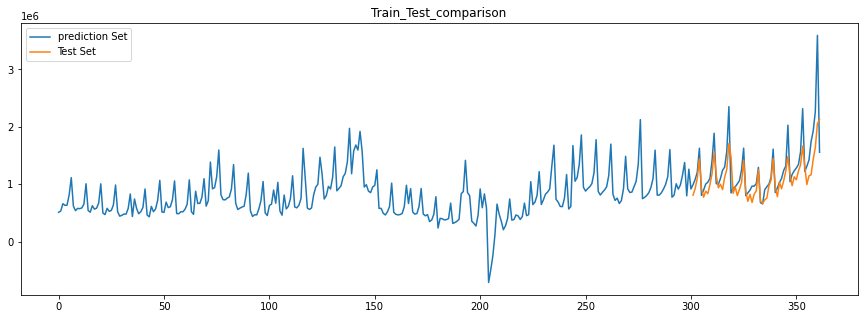

/tmp/ipykernel_586722/811545520.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics = df_metrics.append(df_metrics_results,ignore_index = True)


In [66]:
model2,result2 = model_construction_macro1(df_total1)

In [67]:
model2

In [68]:
result2

,explained_variance,MAE,R^2,MSE,RMSE
0,0.6572,230516.2683,0.5381,1.101233e+11,331848.2692


### Make Prediction

In [69]:
#Dataset Construction
df = df_total1
df = df.reset_index()
df = df.rename(columns = {'saledate':'ds','totalprofit':'y'})

#train/test split
df_train = df[df['ds']<='2005-07-31']
df_test = df[df['ds']>'2005-07-31']
    
def modeling(df_train,dict_param):

    #add seasonality
    '''
        We drop the yearly seasonality since the training dataset is less than one year and we add quarterly, montly seasonality instead.
    '''
    m = Prophet(yearly_seasonality = False,**dict_param)
    #m.add_seasonality(name="quarterly", period=90, fourier_order = 10)
    m.add_seasonality(name='monthly', period=30, fourier_order=5) 

    #add holiday
    m.add_country_holidays(country_name='US')

    #add additional features
    feature_list = ['minorigprice',
                    'ndept',
                    'totalretail',
                    'nvendors',
                    'totalcost',
                    'nsku',
                    'CORESTICKM159SFRBATL',
                    'UNRATE',
                    'DFF']

    for feature in feature_list:
        m.add_regressor(feature+'_1',standardize = "auto")

    m.fit(df_train)

    return m

best_param = {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 0.1}
model = modeling(df_train,best_param)

06:15:37 - cmdstanpy - INFO - Chain [1] start processing
06:15:37 - cmdstanpy - INFO - Chain [1] done processing


In [70]:
#Prediction with macroeconomics indicator model
feature_list = ['minorigprice',
                'ndept',
                'totalretail',
                'nvendors',
                'totalcost',
                'nsku',
                'CORESTICKM159SFRBATL',
                'UNRATE',
                'DFF']

feature_list1 = [each + "_1" for each in feature_list]

df_future = df.copy()
df_future = df_future[feature_list1]
future = model.make_future_dataframe(periods = 27)
future = future.join(df_future)
forecast = model.predict(future)
df_result = forecast[['ds','yhat']]
df_result['y'] = df['y'].tolist()
df_result

/tmp/ipykernel_586722/763727442.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result['y'] = df['y'].tolist()


,ds,yhat,y
0,2004-08-01,1.407597e+04,511060.0
1,2004-08-02,5.093799e+05,532033.0
2,2004-08-03,5.922152e+05,659895.0
3,2004-08-04,5.820055e+05,631430.0
4,2004-08-05,6.446589e+05,635209.0
...,...,...,...
384,2005-08-23,1.316426e+06,1477840.0
385,2005-08-24,1.297657e+06,1982620.0
386,2005-08-25,1.743313e+06,1943150.0
387,2005-08-26,1.846369e+06,2344460.0


In [79]:
aug_profit_pred = sum(df_result[df_result['ds']>'2005-07-31']['yhat'])
aug_profit_true = sum(df_result[df_result['ds']>'2005-07-31']['y'])
print(aug_profit_pred)
print(aug_profit_true)

47268340.640407905
55934830.0


In [78]:
print("Predicted total profit for August is ", aug_profit_pred)

Predicted total profit for August is  47268340.640407905


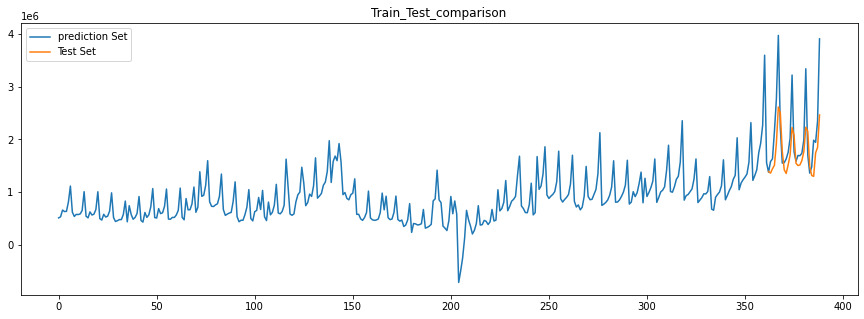

In [74]:
test_ts_draw = df_result['y']
test_prediction = df_result[df_result['ds']>='2005-08-01']['yhat']
fig, ax = plt.subplots(figsize=(15, 5))
test_ts_draw.plot(ax=ax, label='Test Set')
test_prediction.plot(ax=ax, label='prediction Set', title='Train_Test_comparison')
ax.legend(['prediction Set', 'Test Set'])
plt.show()

def show_results(y_true, y_pred):
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    r2=metrics.r2_score(y_true, y_pred)

    df_metrics = pd.DataFrame(columns = ['explained_variance','MAE','R^2','MSE','RMSE'])
    df_metrics_results = {'explained_variance':round(explained_variance,4),'MAE':round(mean_absolute_error,4),
                         'R^2':round(r2,4),'MSE':round(mse,4),'RMSE':round(np.sqrt(mse),4)}
    df_metrics = df_metrics.append(df_metrics_results,ignore_index = True)

    return df_metrics

In [75]:
show_results(df_result[df_result['ds']>'2005-07-31']['y'],df_result[df_result['ds']>'2005-07-31']['yhat'])

/tmp/ipykernel_586722/3653359597.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics = df_metrics.append(df_metrics_results,ignore_index = True)


,explained_variance,MAE,R^2,MSE,RMSE
0,0.5583,424600.0849,0.3592,3.316285e+11,575871.9809


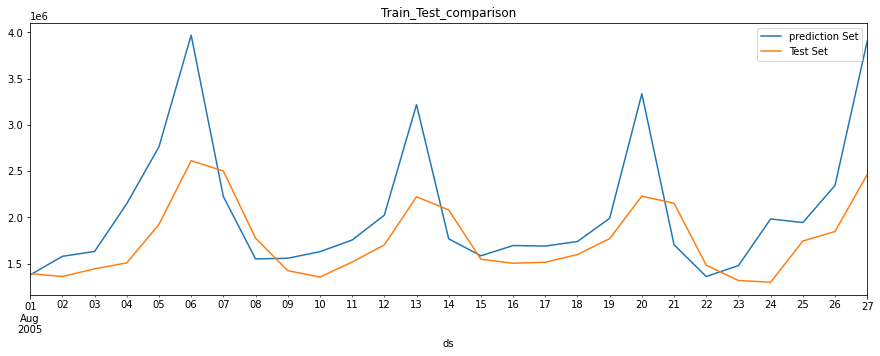

In [76]:
test_prediction = df_result[df_result['ds']>'2005-07-31'][['ds','yhat']]
test_ts_draw = df_result[df_result['ds']>'2005-07-31'][['ds','y']]
fig, ax = plt.subplots(figsize=(15, 5))
test_ts_draw.plot(ax=ax, x = 'ds', y = 'y',label='Test Set')
test_prediction.plot(ax=ax, x = 'ds', y = 'yhat',label='prediction Set', title='Train_Test_comparison')
ax.legend(['prediction Set', 'Test Set'])
plt.show()